# Input and Output
The purpose of this section of code is to describe the input dataset for this Automated Decision System.  In particular, we wish to explore the input features, their respective distributions and the prevalence of missing values.  Finally, we wish to explore the output of our ADS and its interpretation.

## Import Training Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.ticker as mtick
import seaborn as sns
from pandas_profiling import ProfileReport

aug_train = pd.read_csv('../data/aug_train.csv')
display(aug_train.head())
print(aug_train.shape)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


(19158, 14)


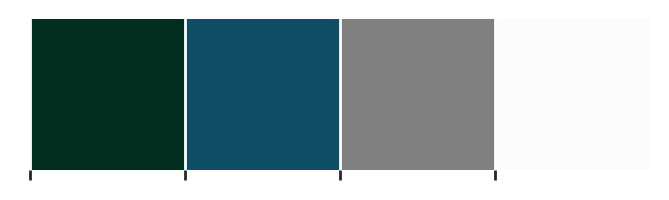

In [2]:
# For Visualizations
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.dpi'] = 200
sns.palplot(['#002d1d','#0e4f66','gray','#fbfbfb'])

In [3]:
ProfileReport(aug_train, minimal=True).to_file(output_file="train_profile_report.html")

## Possible Values and Missing Data

In [4]:
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
aug_train.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [6]:
aug_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


## Visualization of Categorial Features

In [7]:
## Convert target to a categorical feature
aug_train["target"] = aug_train["target"].astype(object)

/Users/clairest-donat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


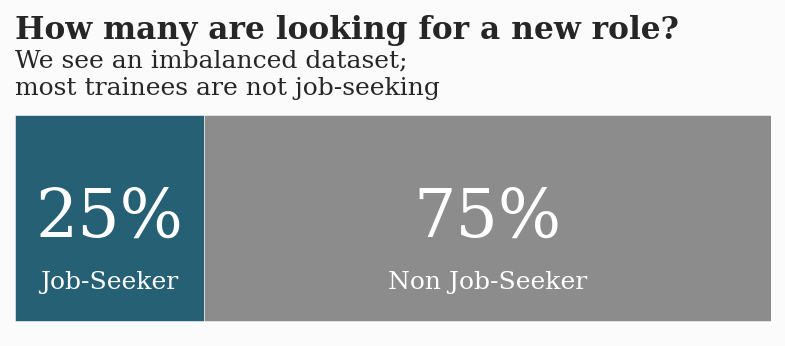

In [8]:
x=aug_train.groupby(['target'])['target'].count()
y=len(aug_train)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec=background_color, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')


fig.text(0.125,1.1,'How many are looking for a new role?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost trainees are not job-seeking',fontfamily='serif',fontsize=12)  

plt.show()

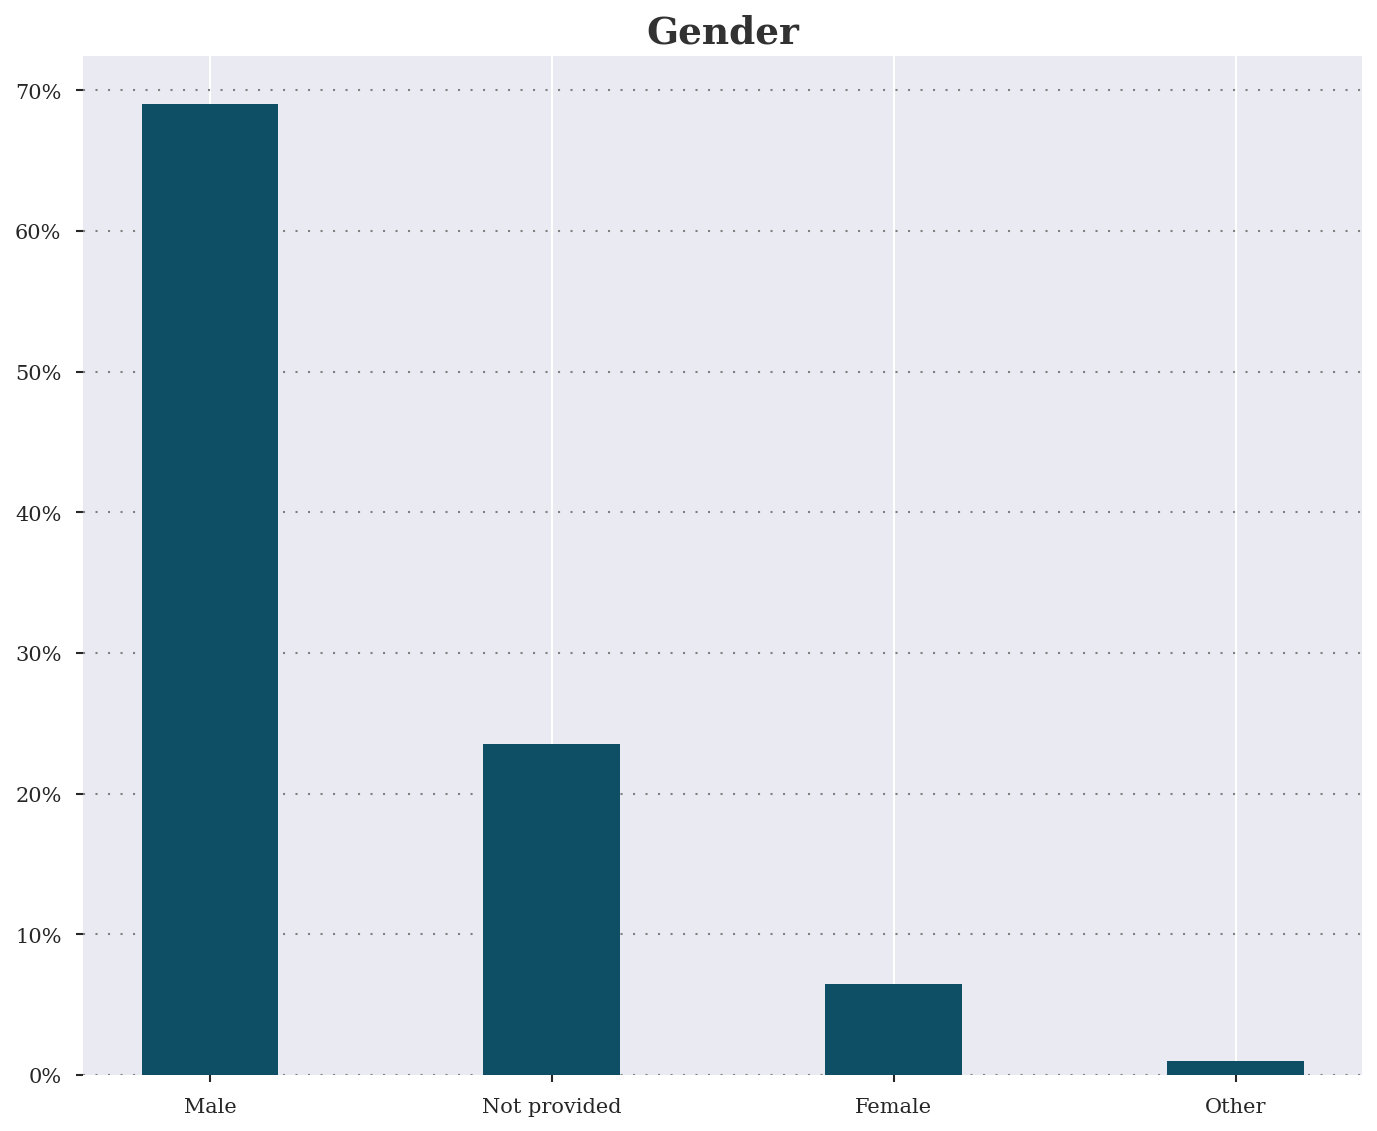

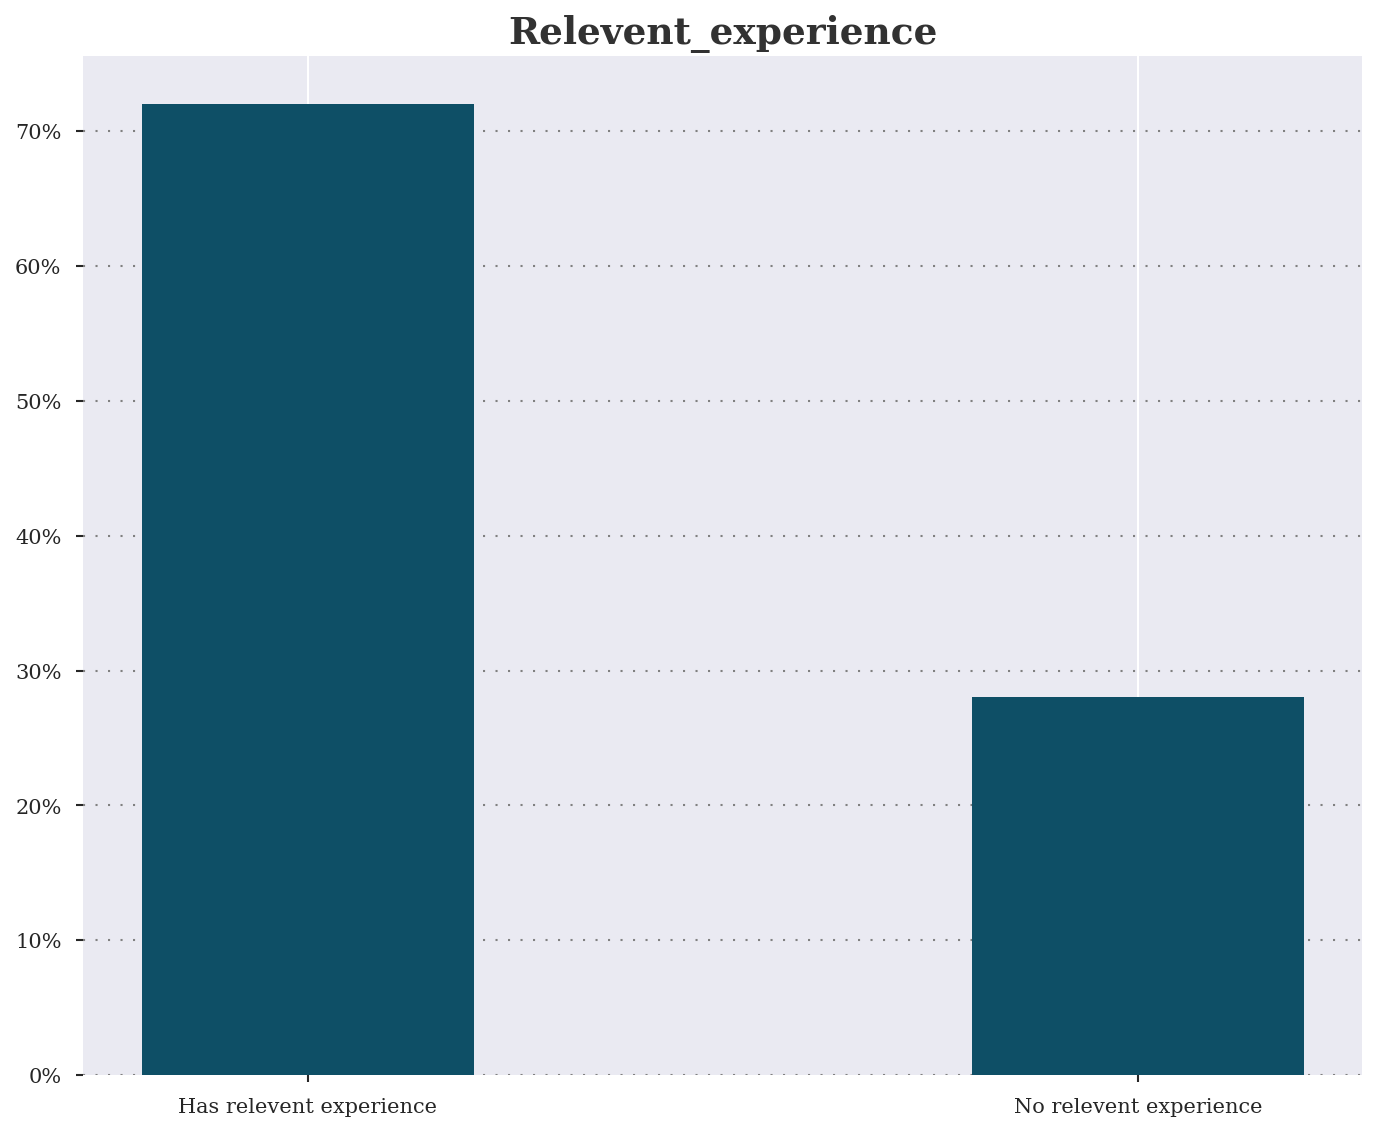

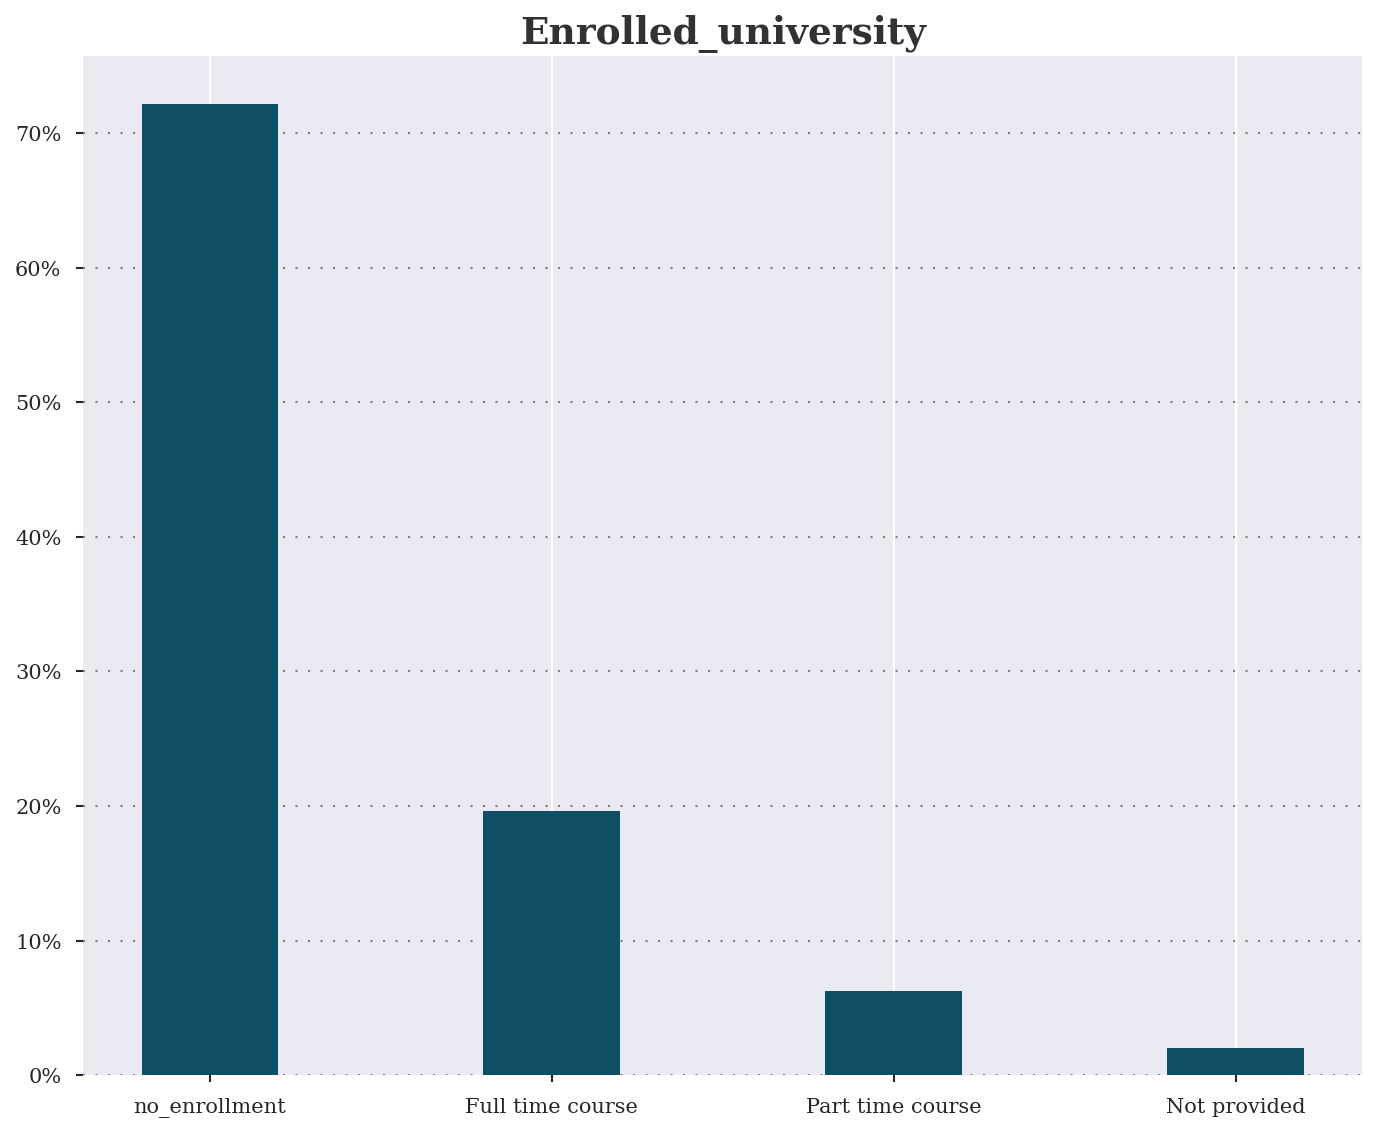

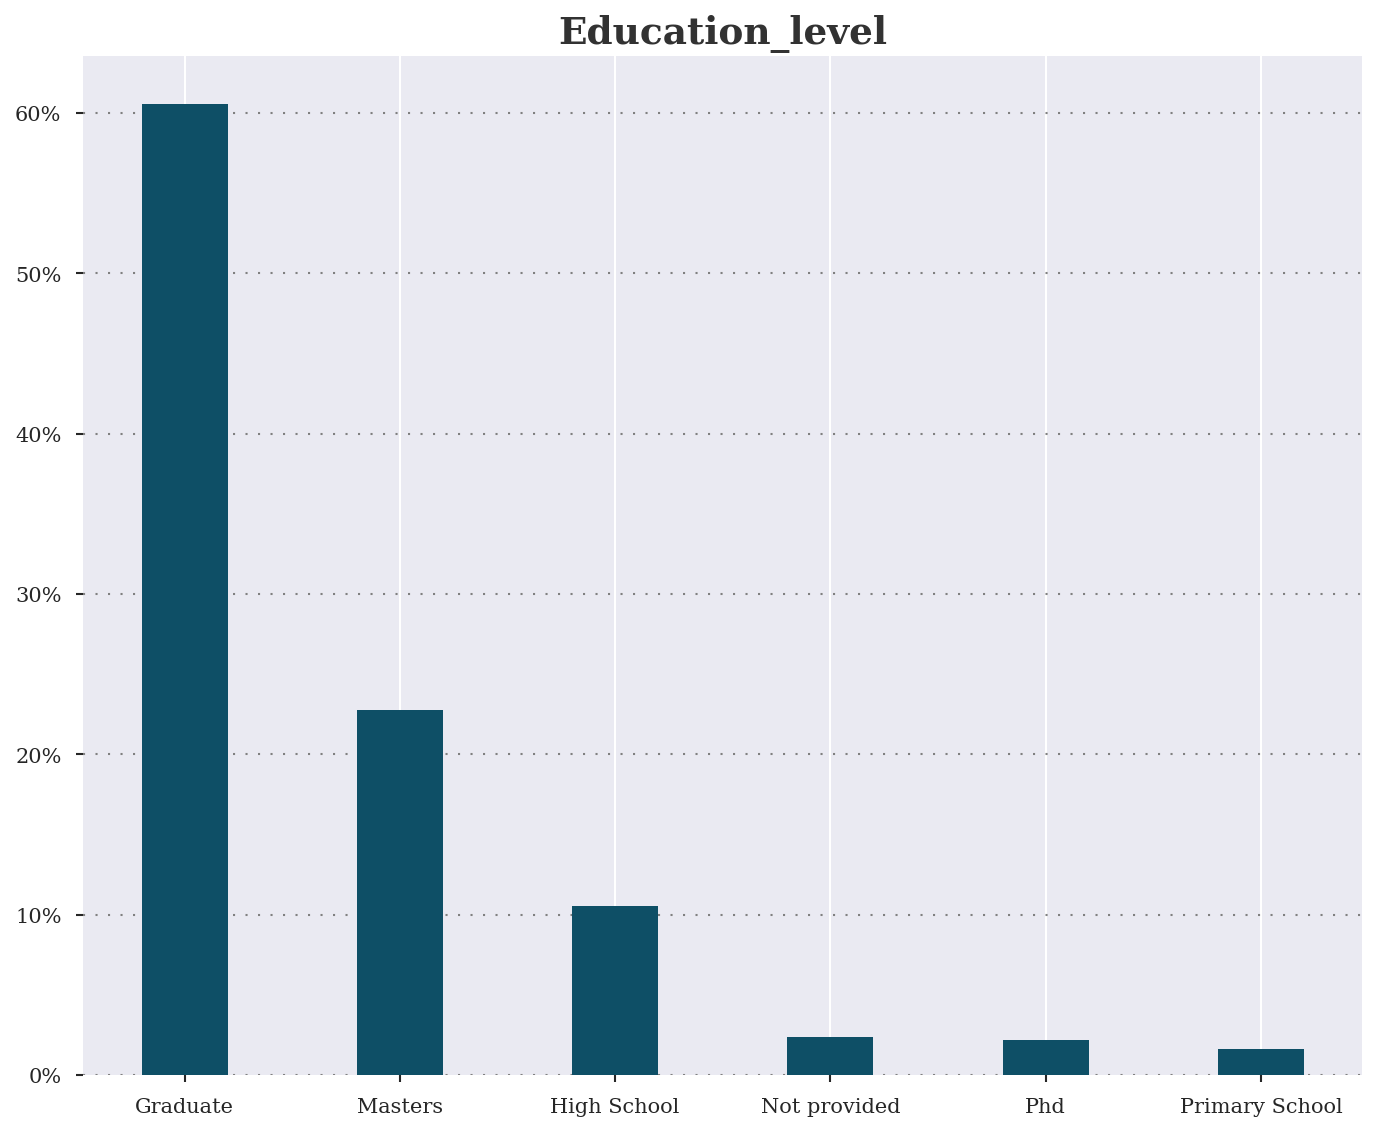

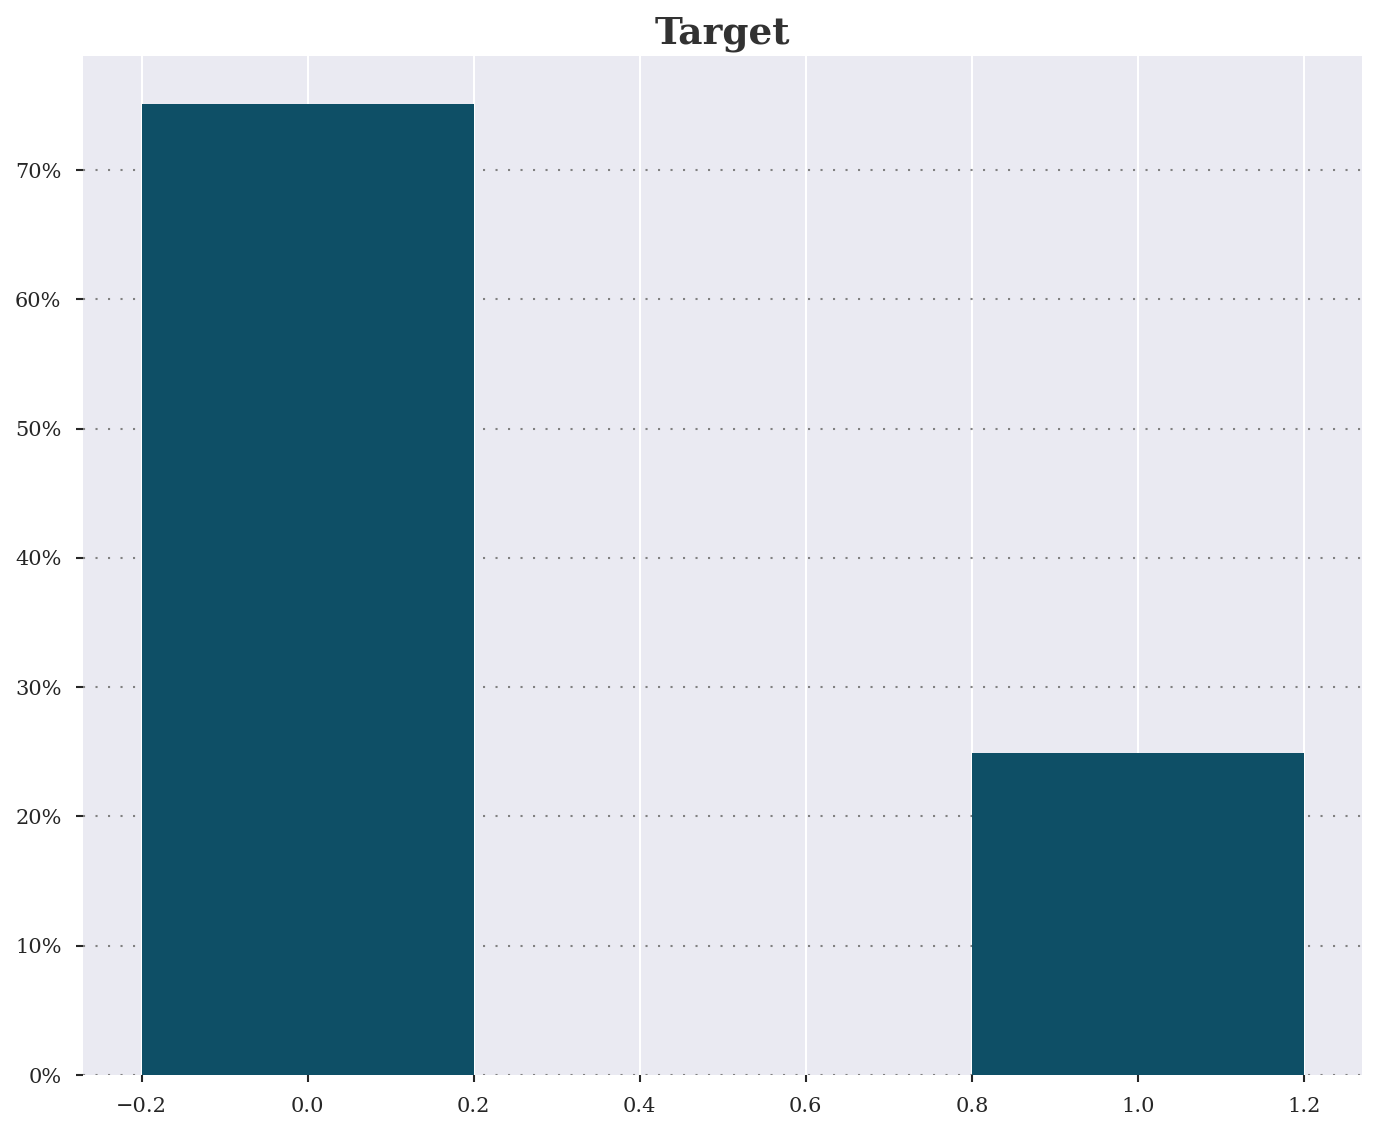

In [9]:
## Capture categorial features with low cardinality
low_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()<=5].tolist()

for col in low_cardinality_categorical_cols:
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    graph = pd.DataFrame(aug_train[col].value_counts(normalize=True, dropna = False)*100)
    graph.index = graph.index.fillna('Not provided')

    plt.bar(graph.index, graph[col], zorder=3, color='#0e4f66', width=0.4)

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    plt.title(col.capitalize(), fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    plt.show()

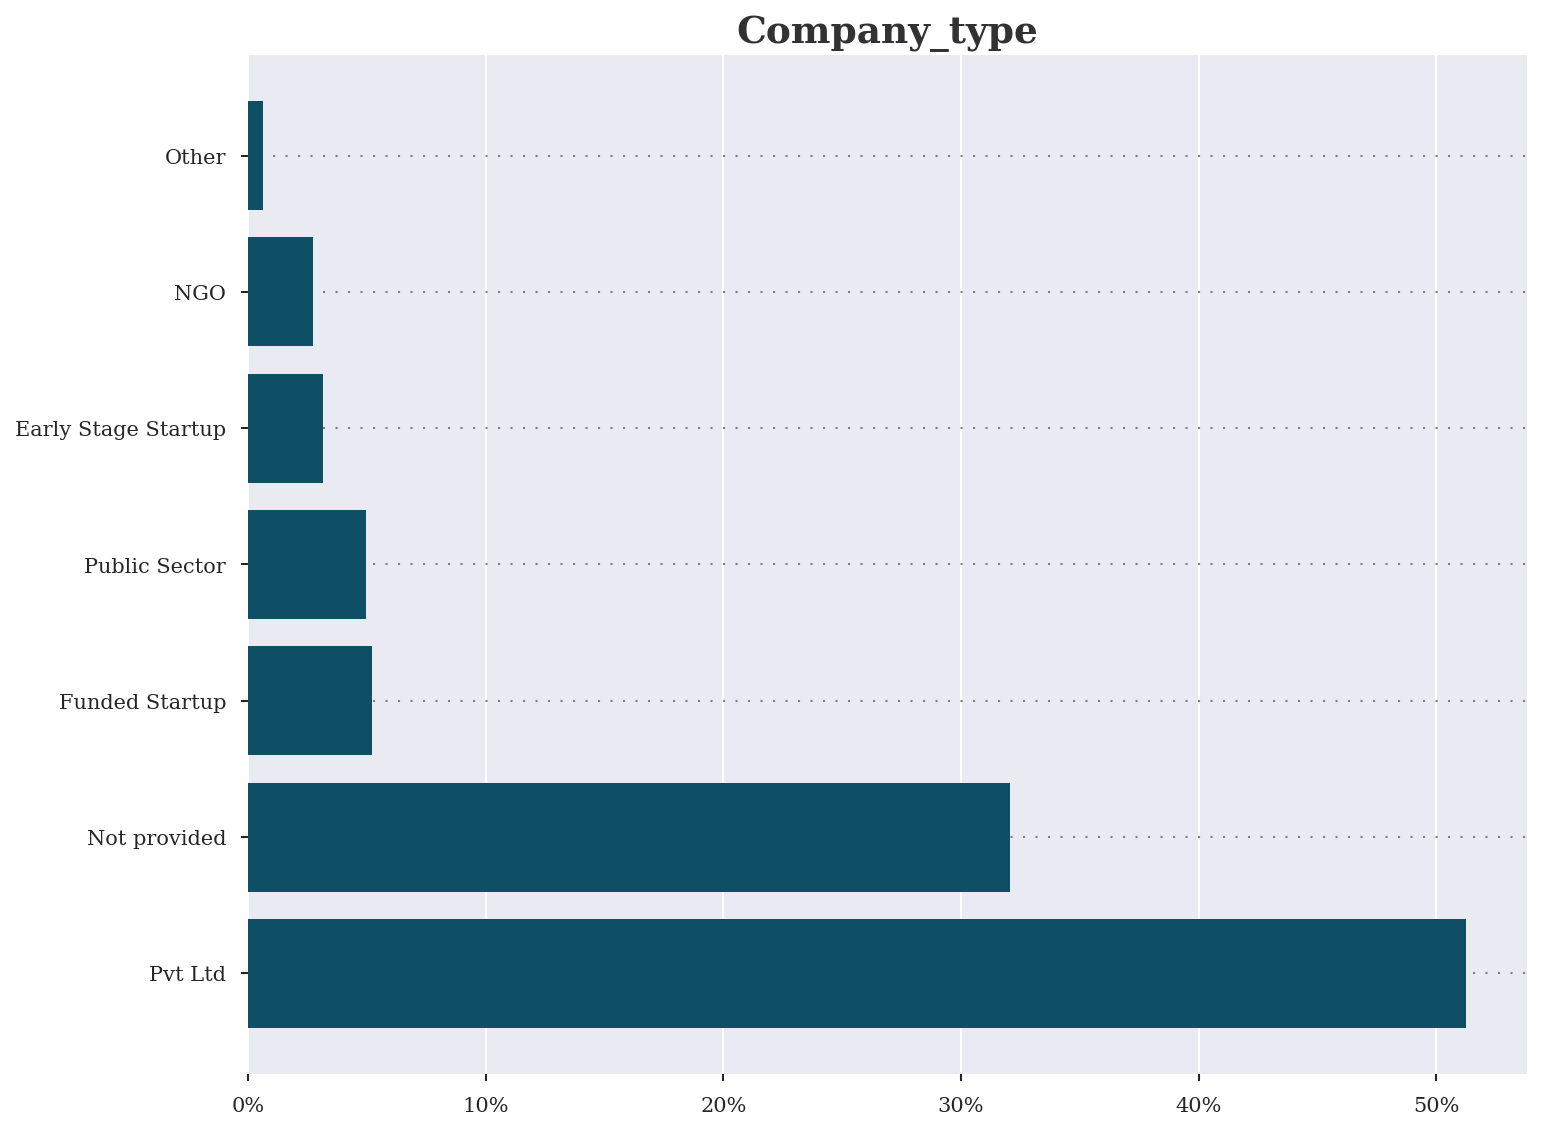

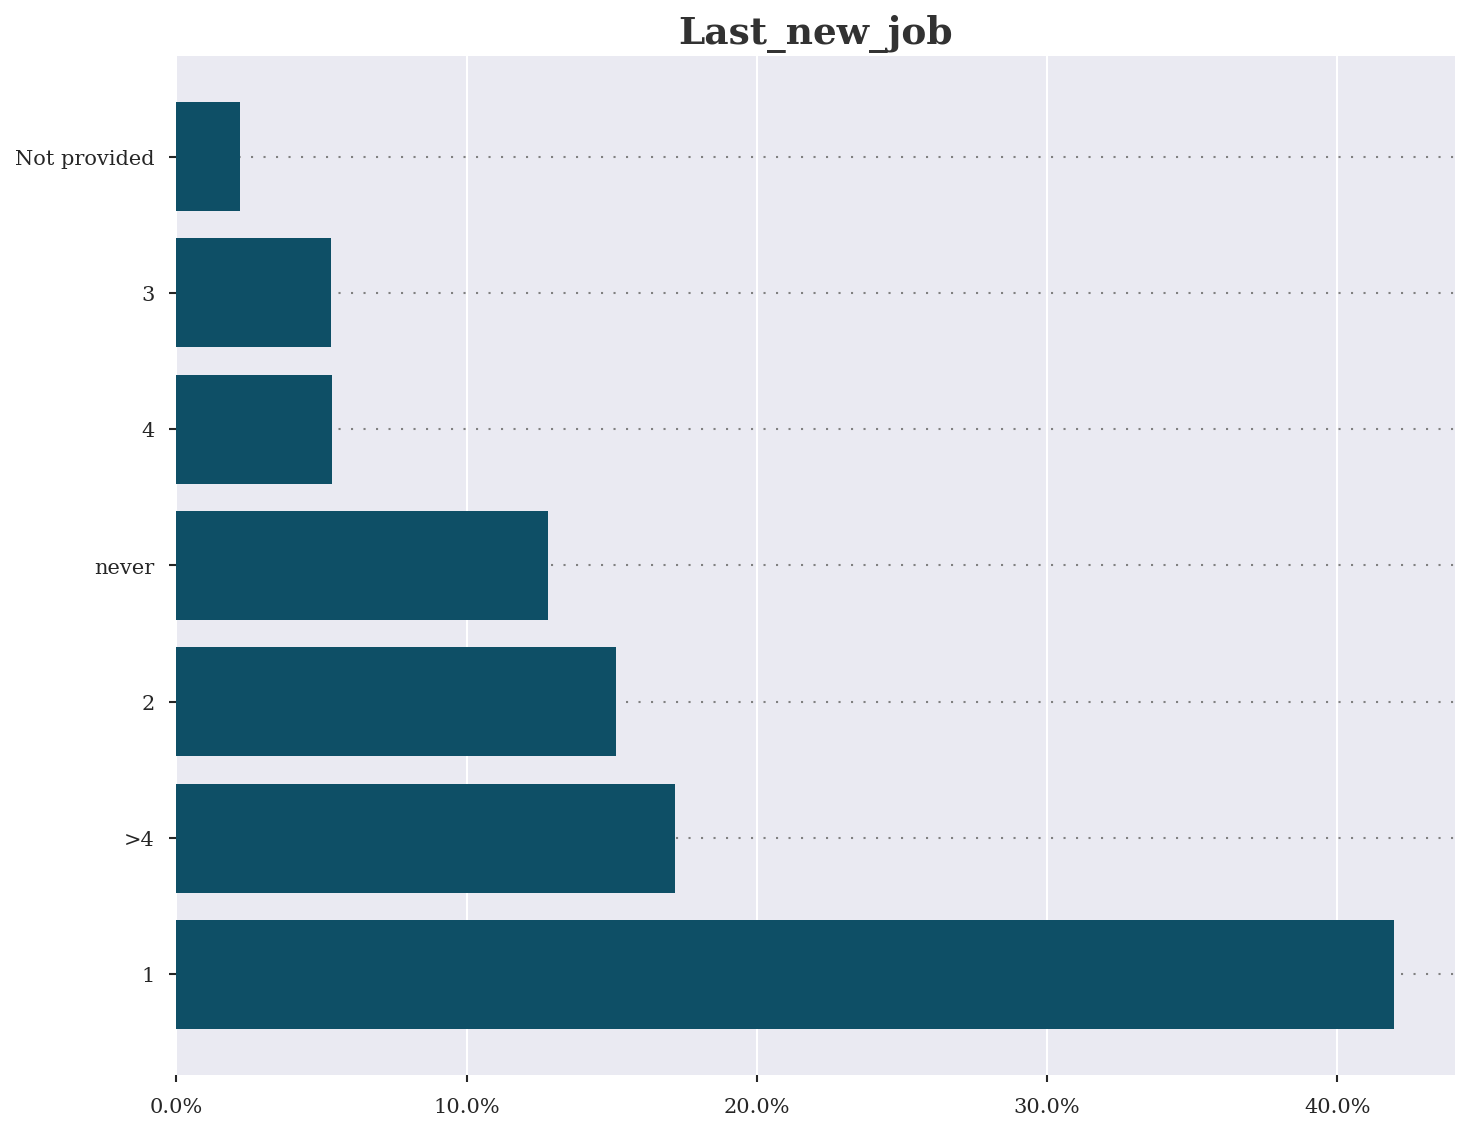

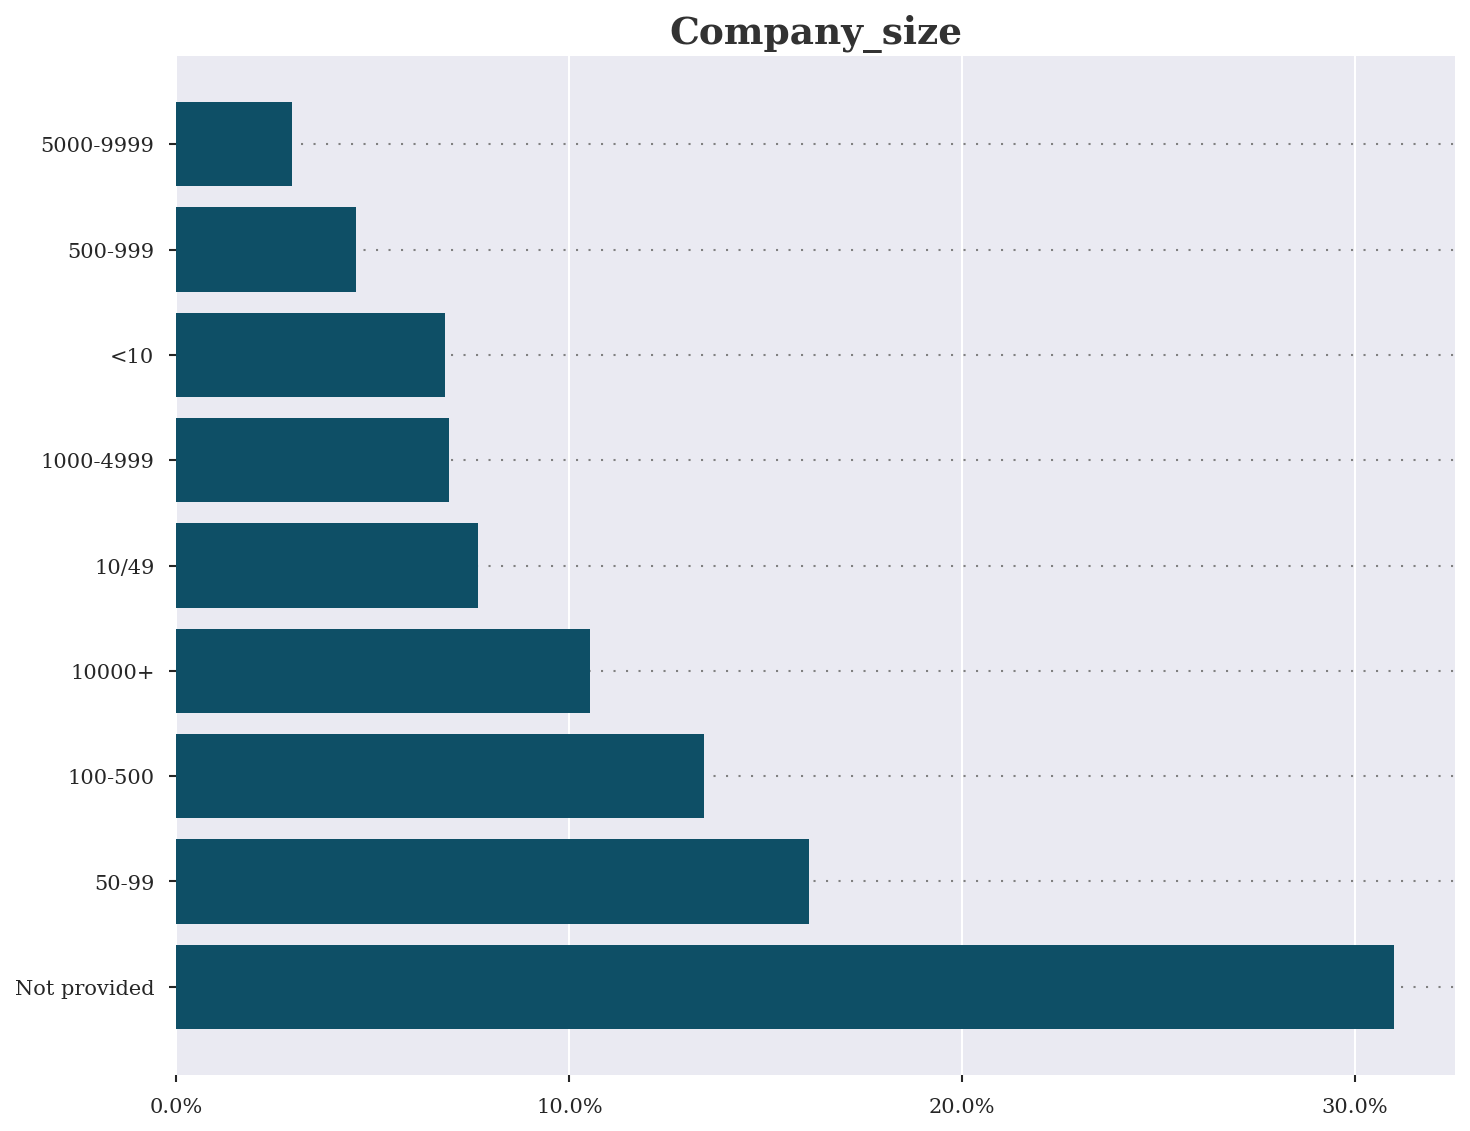

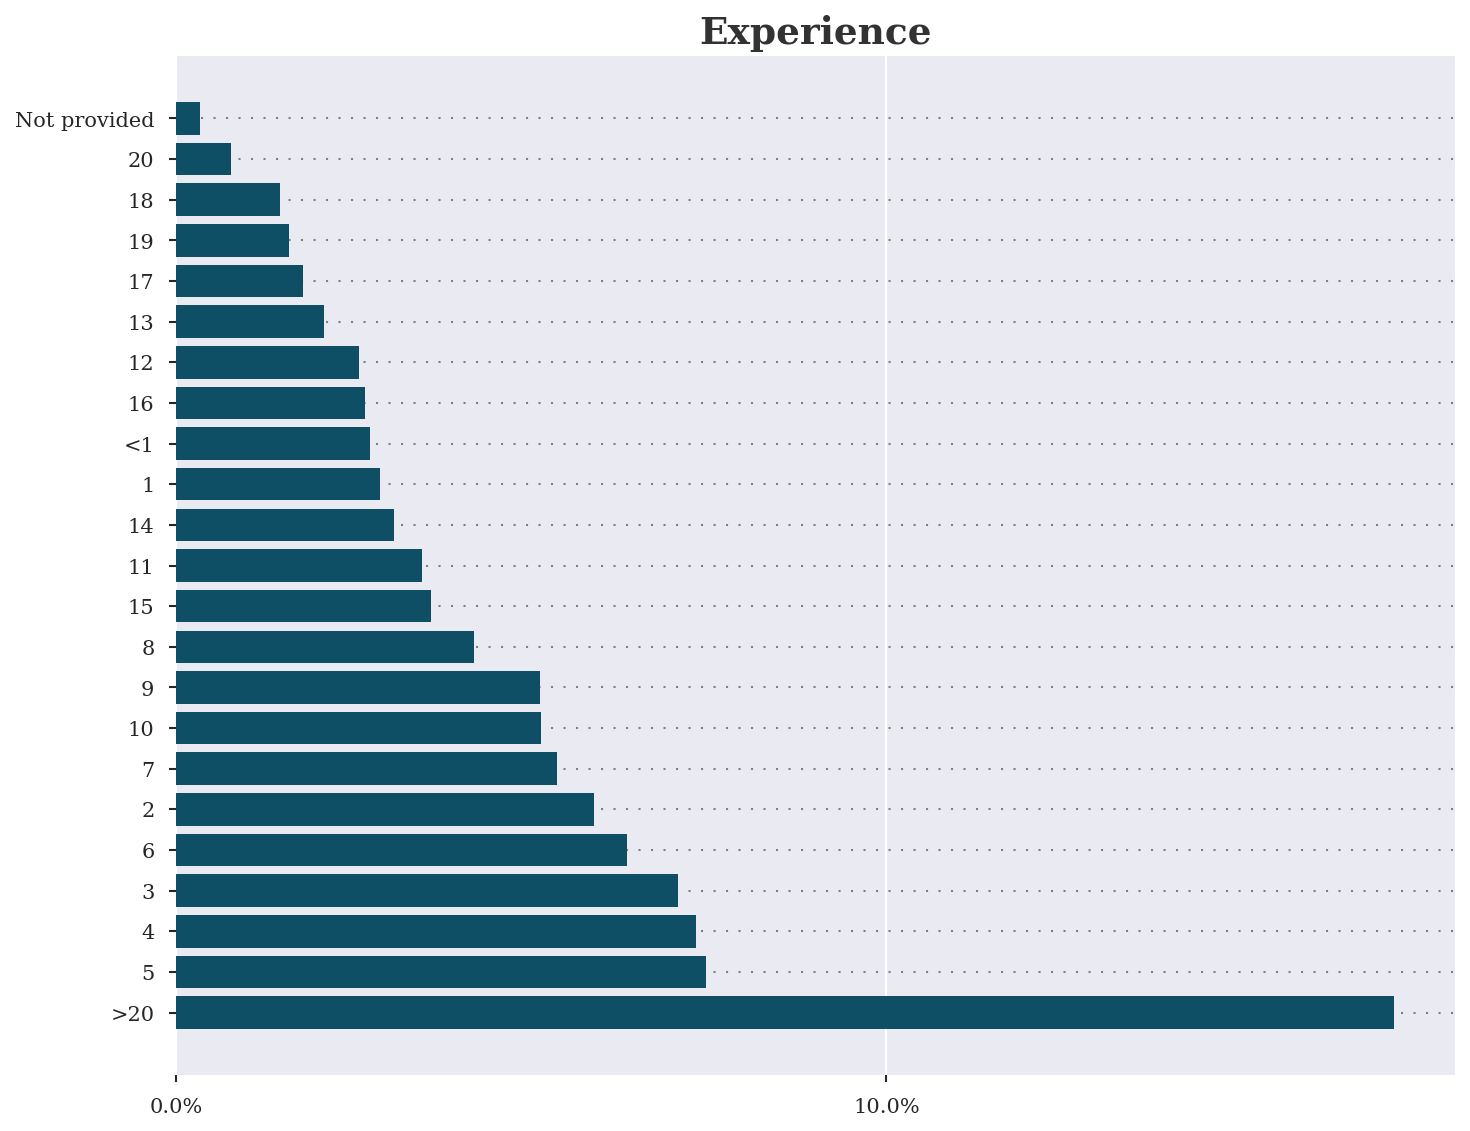

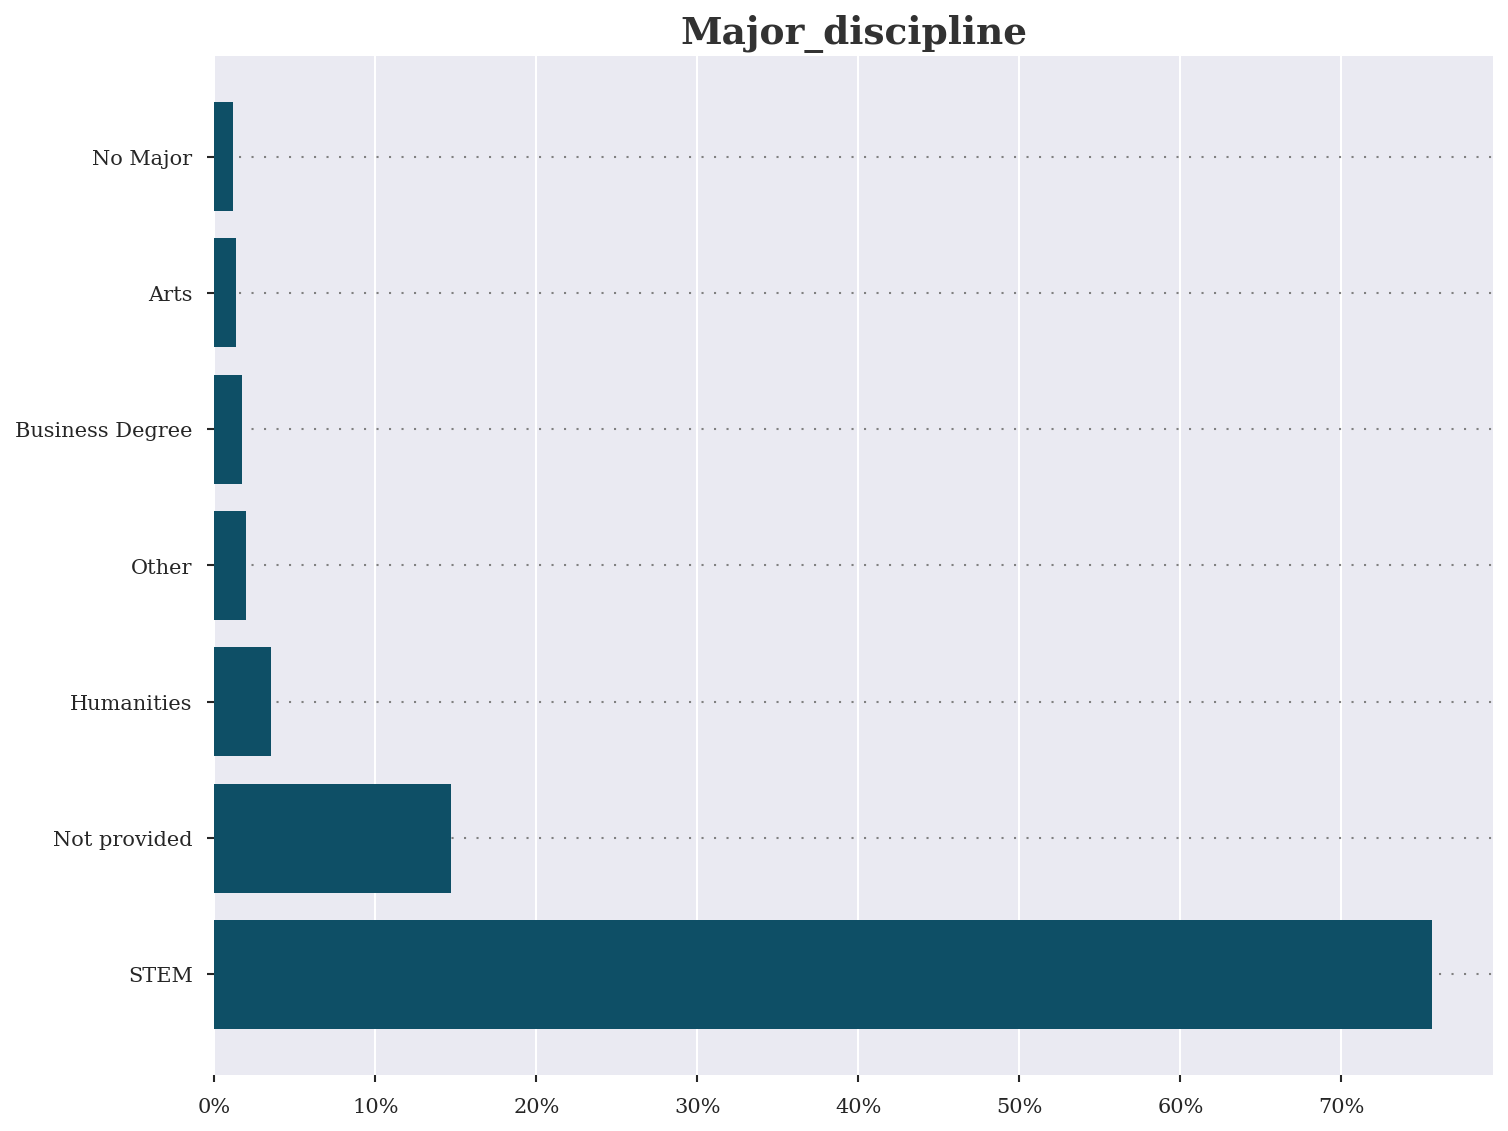

In [10]:
## Cycle through all categorical variables with low cardinality
cat_columns = aug_train.select_dtypes(include=['object']).columns.tolist()
high_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()>5].tolist()

high_cardinality_categorical_cols = list(set(cat_columns) & set(high_cardinality_categorical_cols))
high_cardinality_categorical_cols.remove('city')

for col in high_cardinality_categorical_cols:
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    graph = pd.DataFrame(aug_train[col].value_counts(normalize=True, dropna = False)*100)
    graph.index = graph.index.fillna('Not provided')

    plt.barh(graph.index, graph[col], zorder=3, color='#0e4f66')

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    plt.title(col.capitalize(), fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    plt.show()

<AxesSubplot:title={'center':'City Development Index'}, xlabel='city_development_index', ylabel='Density'>

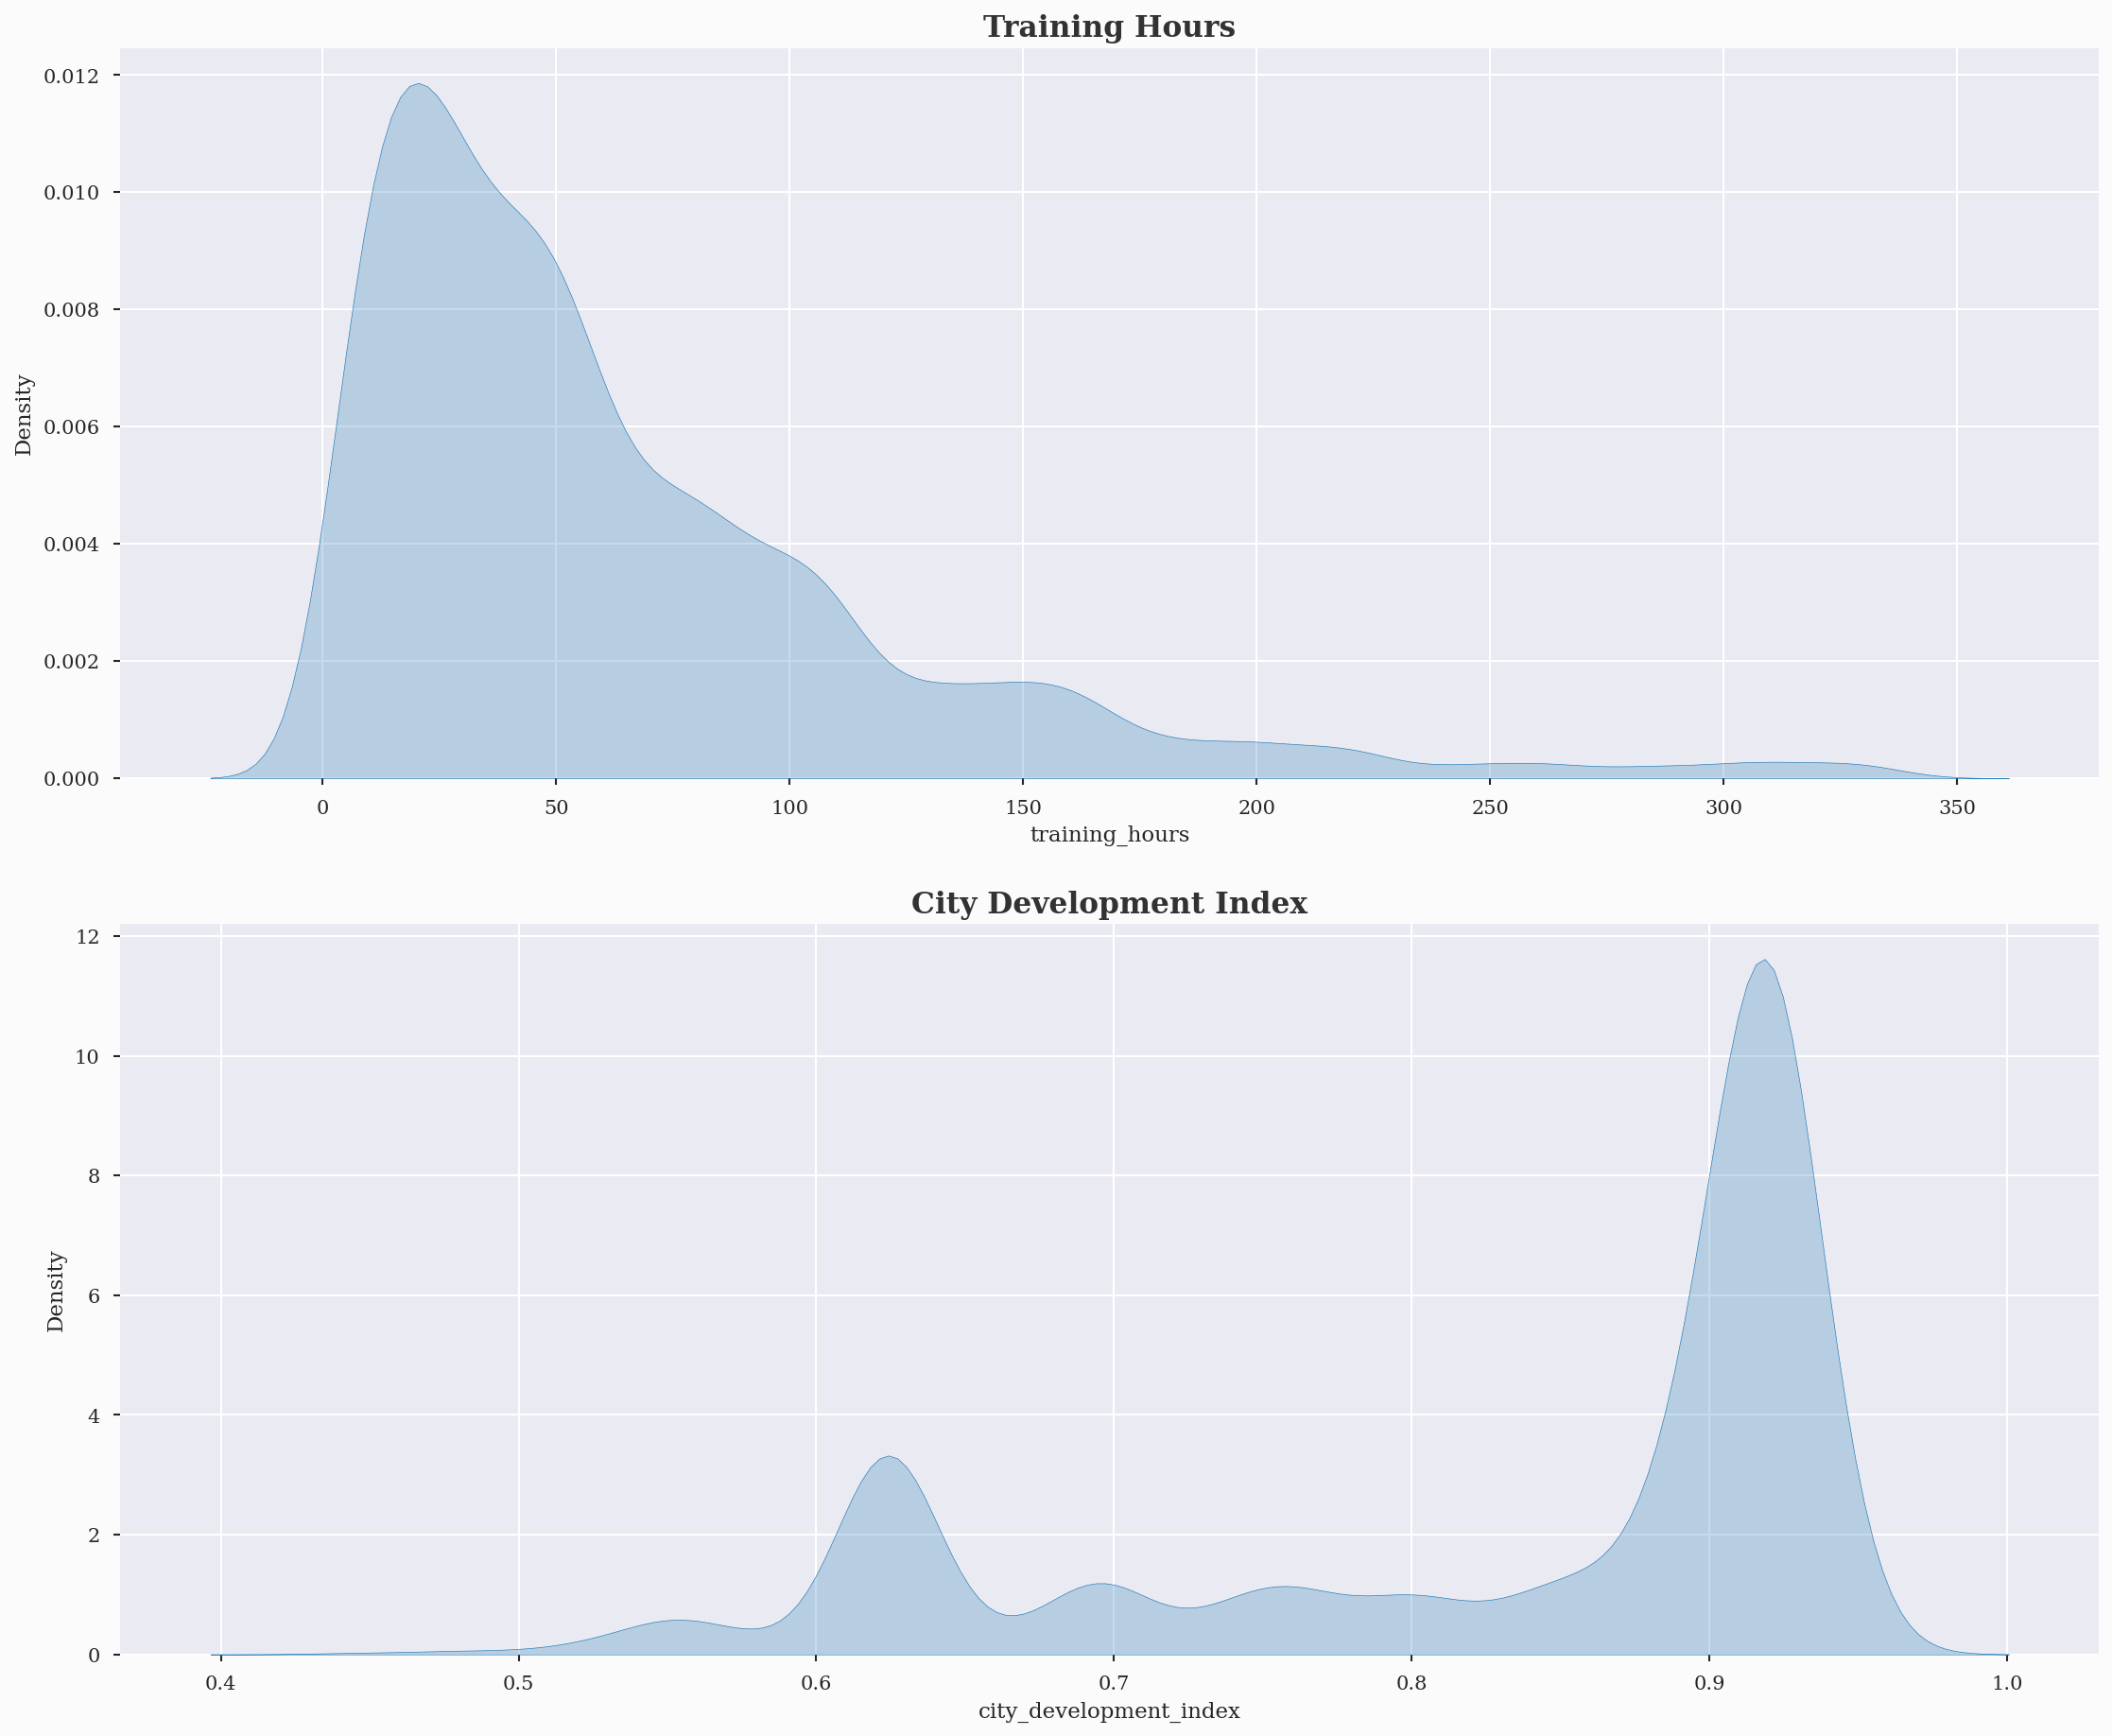

In [11]:
## Visualize distribution of numeric columns
columns = ['city_development_index', 'training_hours']

color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

ax0.set_title('Training Hours', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(aug_train["training_hours"], shade=True, ax = ax0, zorder = 3)

ax1.set_title('City Development Index', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(aug_train["city_development_index"], shade=True, ax = ax1, zorder = 3)

### Scratch Code to look Into reformatting bar plots with custom ordering

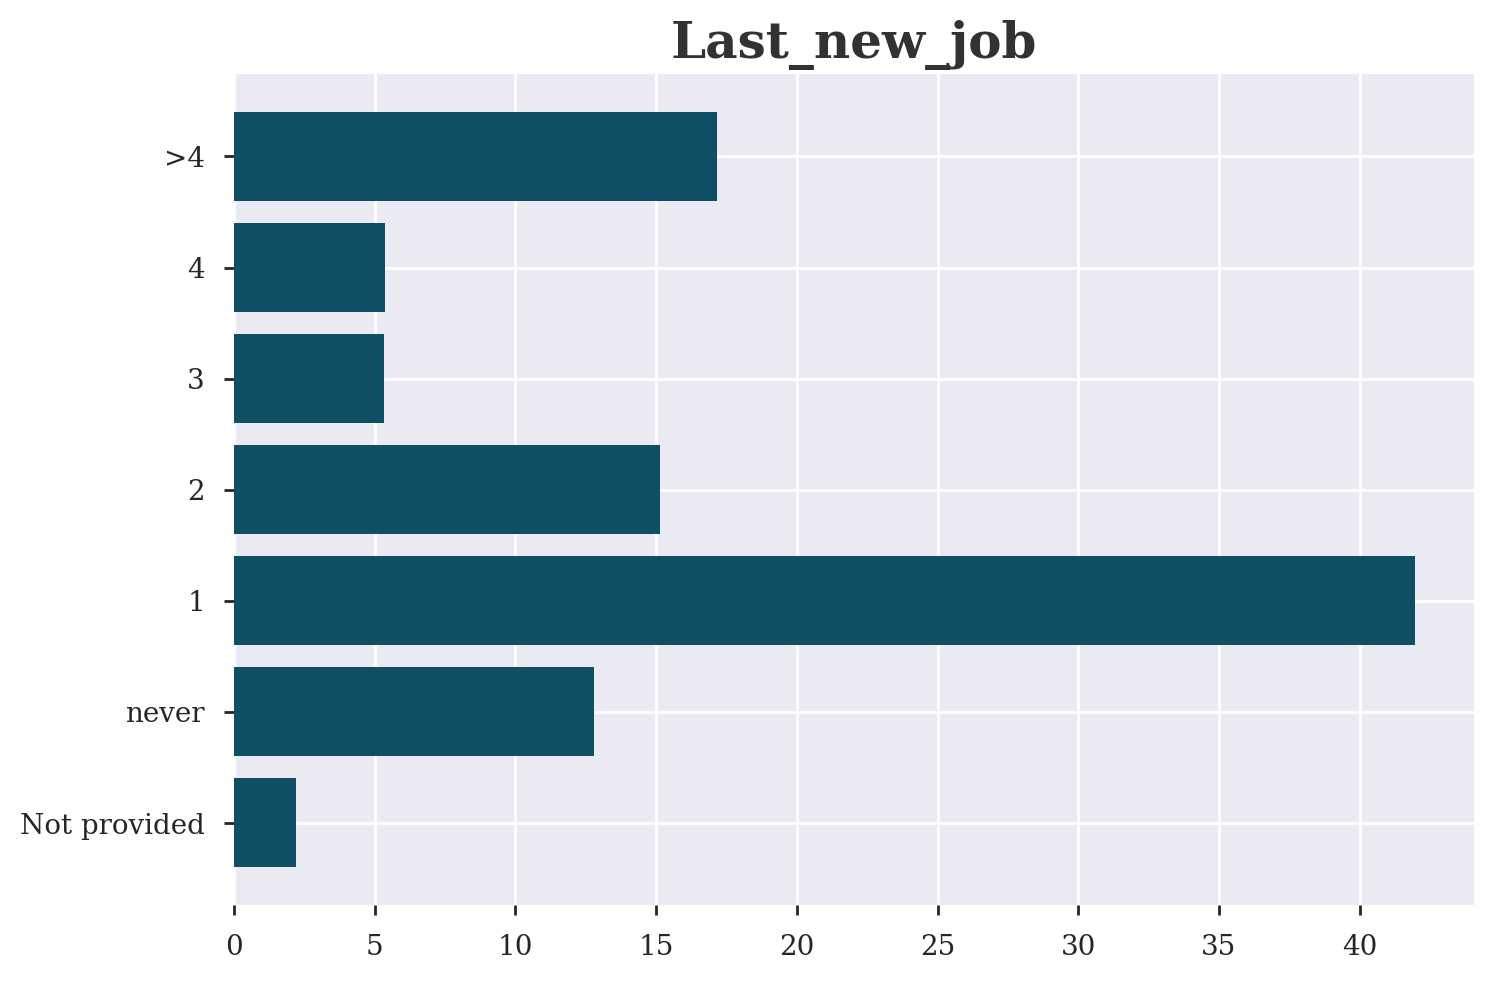

In [12]:
# Add orders to our variables for the sake of visualization

ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['no_enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
size_order = ['0','<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']

# create an ordered bar plot
job_order = ['Not provided', 'never', '1', '2', '3', '4', '>4']
graph = pd.DataFrame(aug_train['last_new_job'].value_counts(normalize=True, dropna = False)*100)
graph.index = graph.index.fillna('Not provided')

plt.barh(graph.loc[job_order].index, graph.loc[job_order]['last_new_job'], zorder=3, color='#0e4f66')

ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_locator(mtick.MultipleLocator(10))

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
    
plt.title('last_new_job'.capitalize(), fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
plt.show()


## Work on the Difference in Distribution on protected attributes

In this dataset, we consider ['gender', 'city_development_index', 'experience', 'target'] to all be protected attributes

<AxesSubplot:title={'center':'City Development Index By Target'}, xlabel='city_development_index', ylabel='Density'>

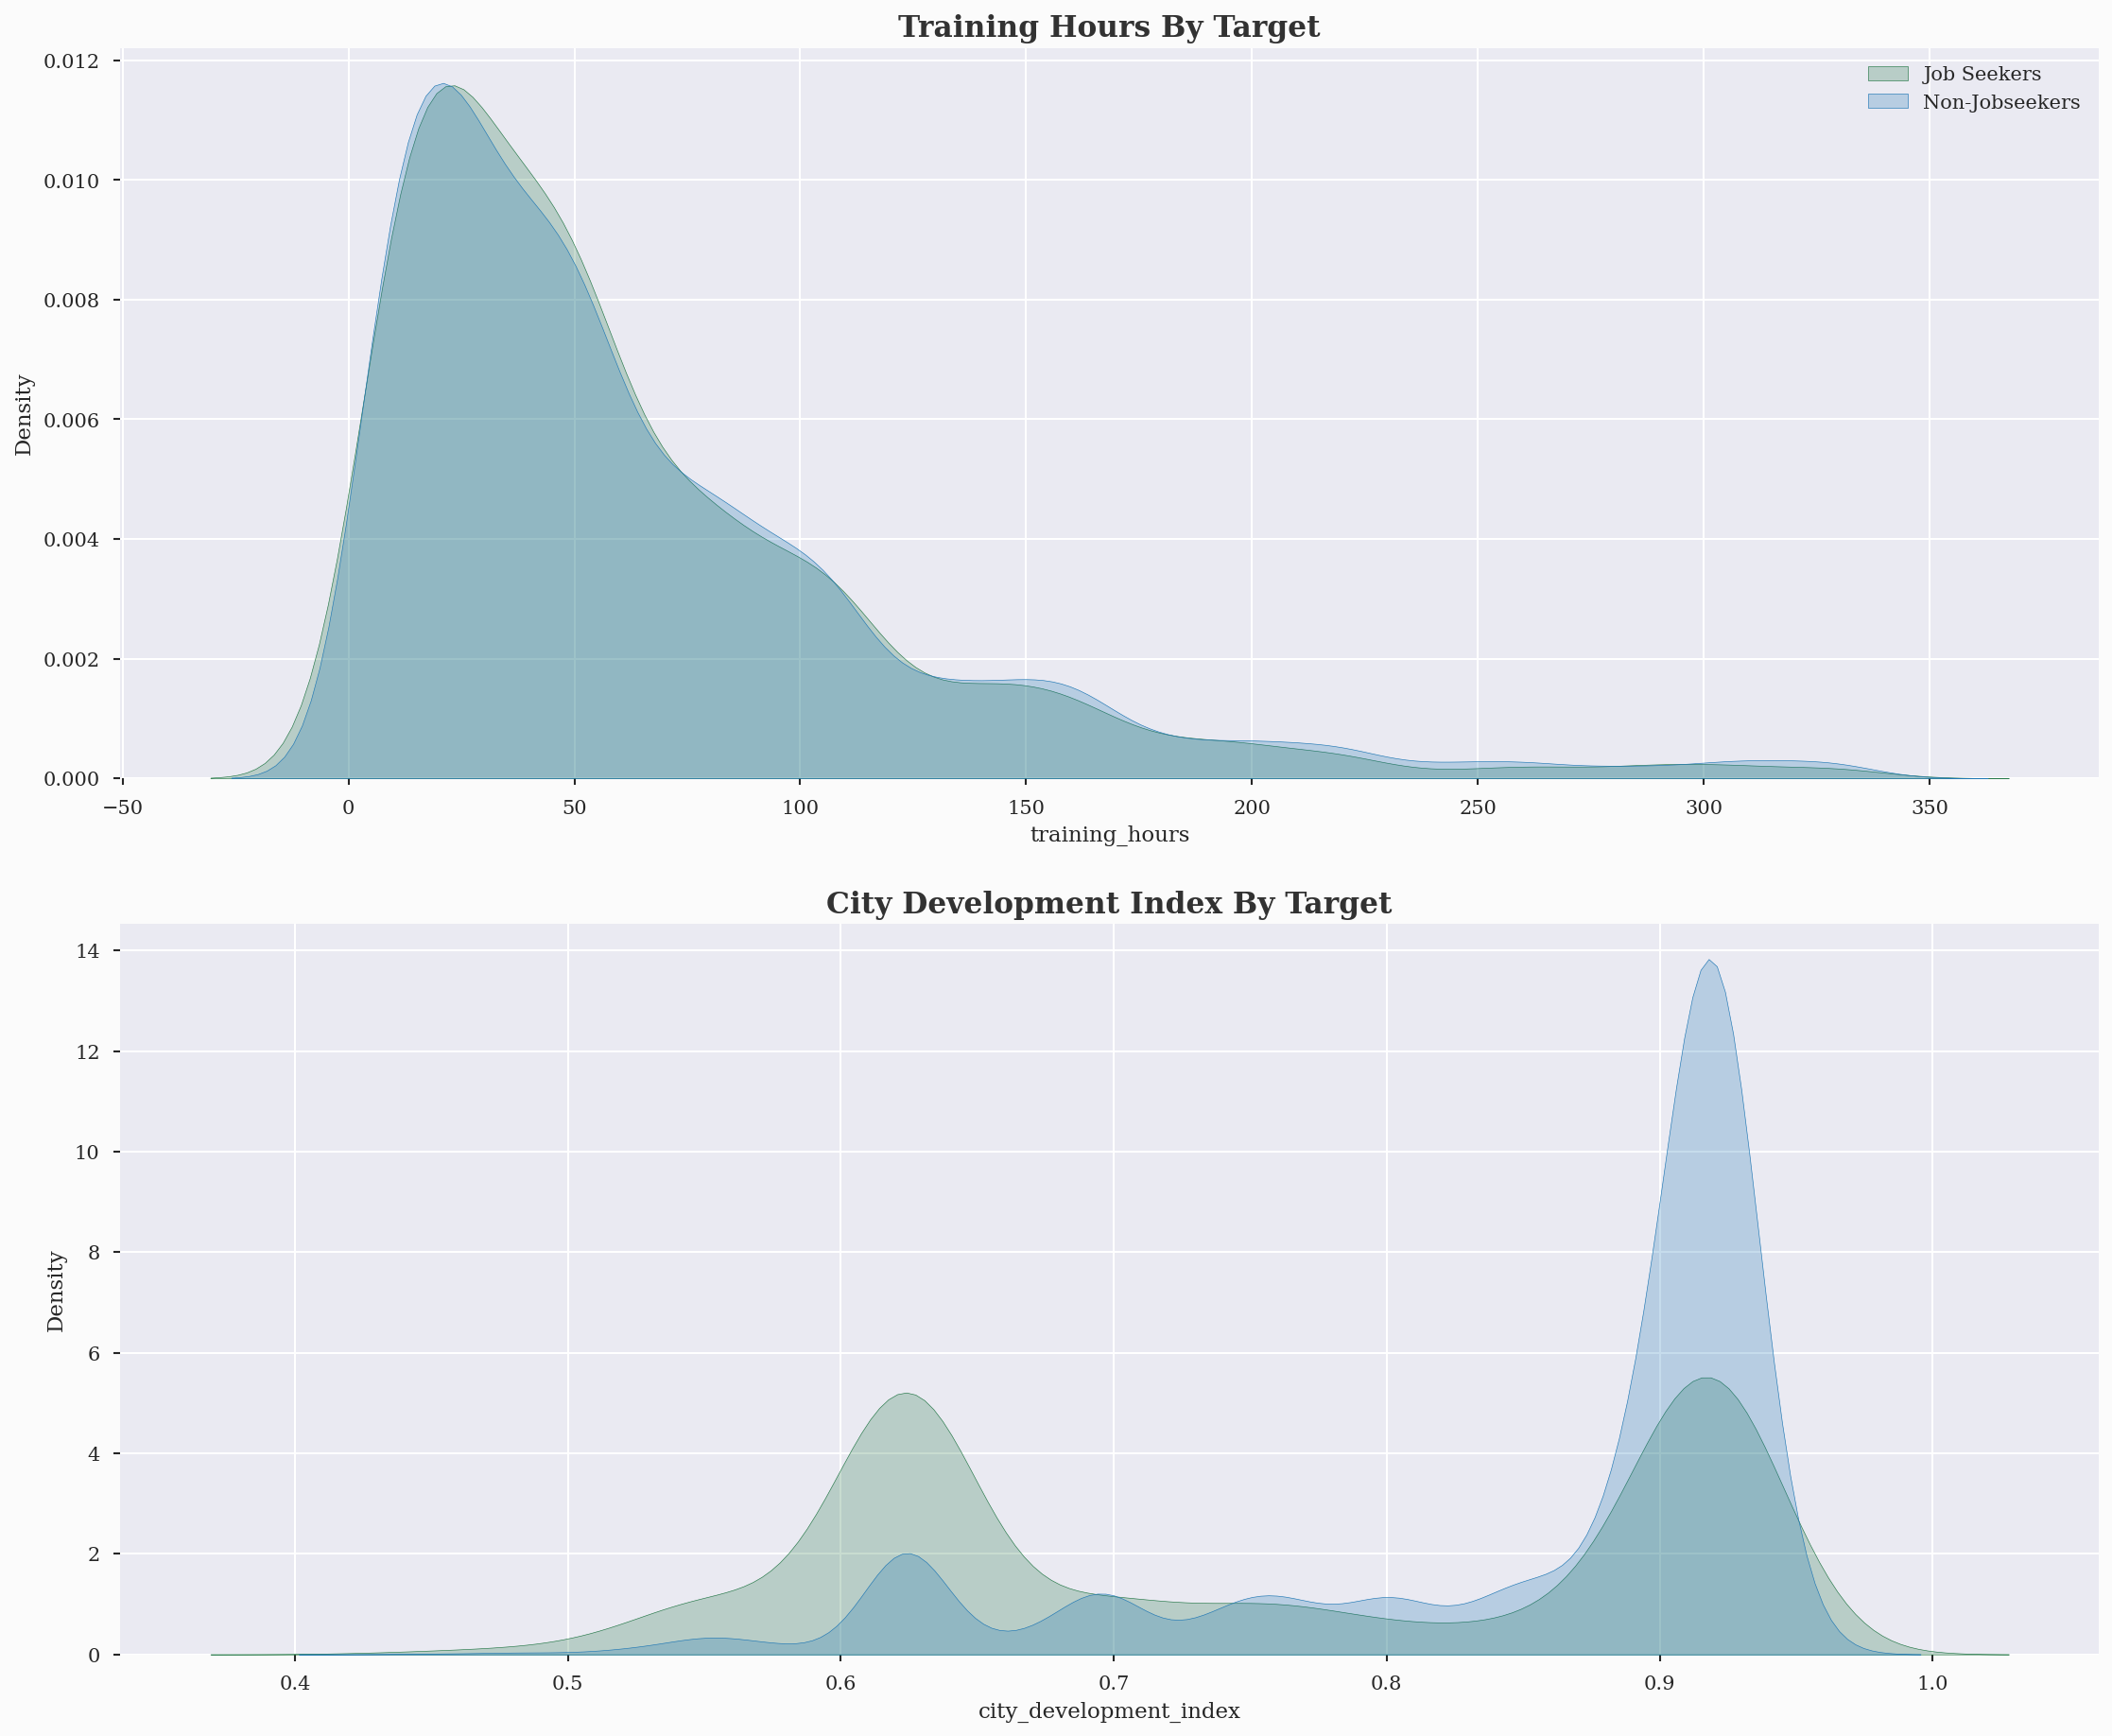

In [35]:
## Visualize distribution of numeric columns
columns = ['city_development_index', 'training_hours']

jobseekers = aug_train[aug_train.target==1]
nonjobseekers = aug_train[aug_train.target==0]

color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

ax0.set_title('Training Hours By Target', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(jobseekers["training_hours"], color="#247747", shade=True, ax = ax0, zorder = 3, label='Job Seekers')
sns.kdeplot(nonjobseekers["training_hours"], shade=True, ax = ax0, zorder = 3, label='Non-Jobseekers')
ax0.legend()

ax1.set_title('City Development Index By Target', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(jobseekers["city_development_index"], color="#247747", shade=True, ax = ax1, zorder = 3)
sns.kdeplot(nonjobseekers["city_development_index"], shade=True, ax = ax1, zorder = 3)

/Users/clairest-donat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


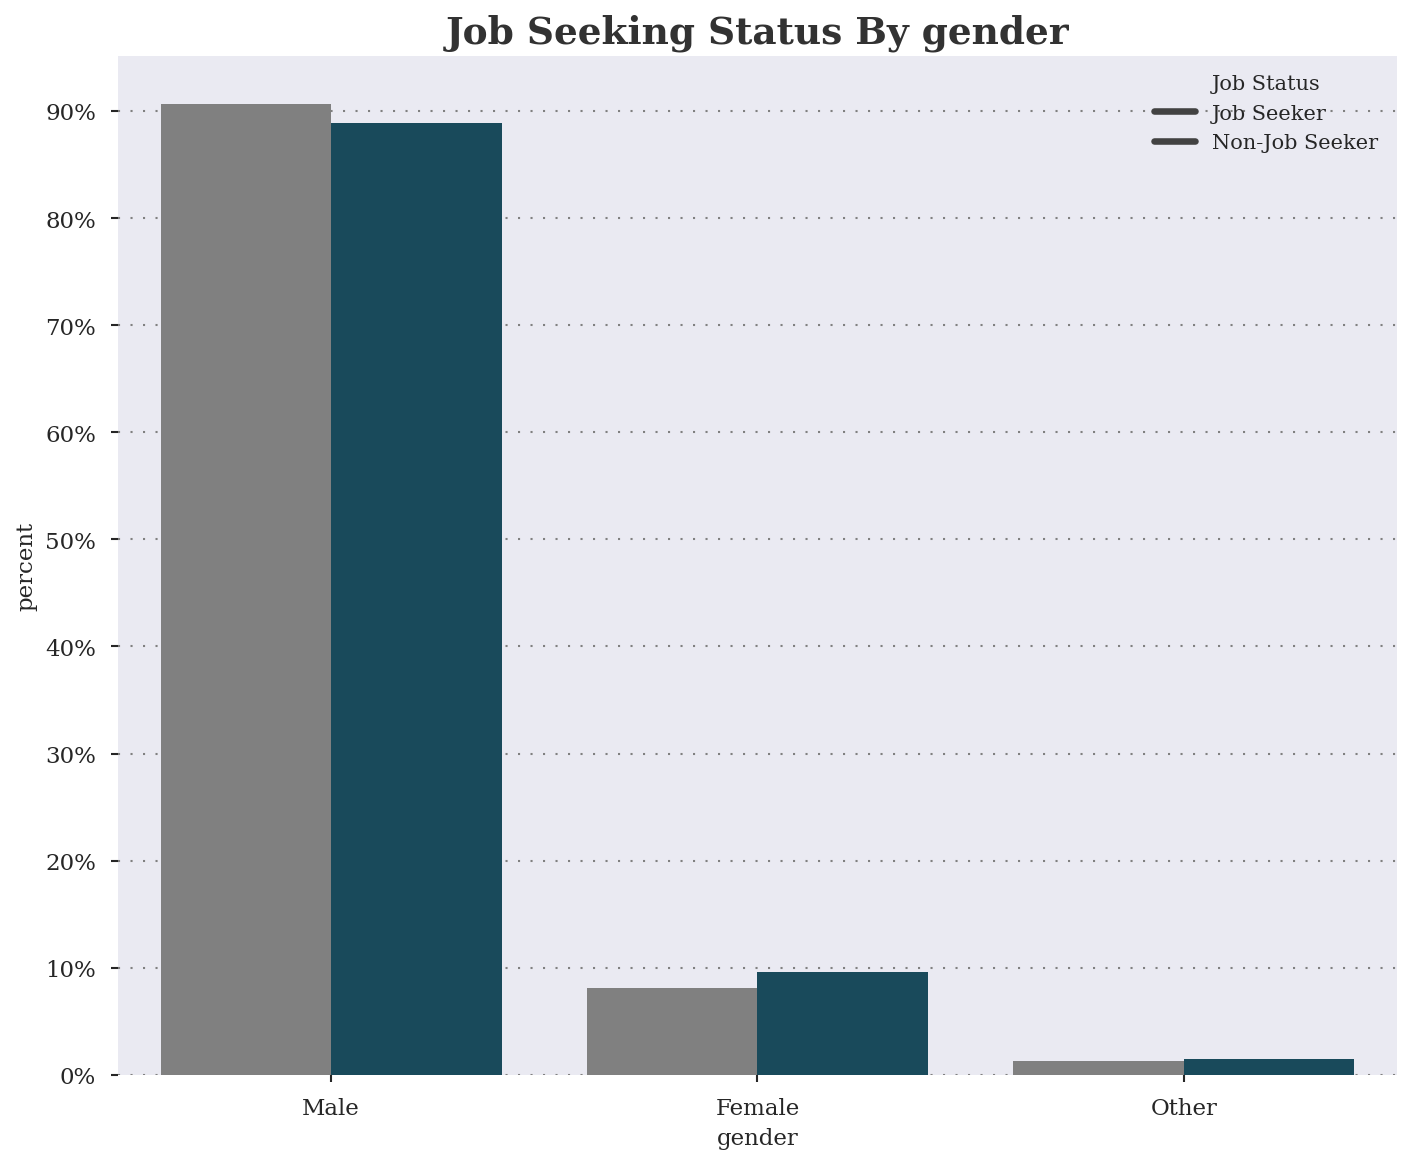

/Users/clairest-donat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


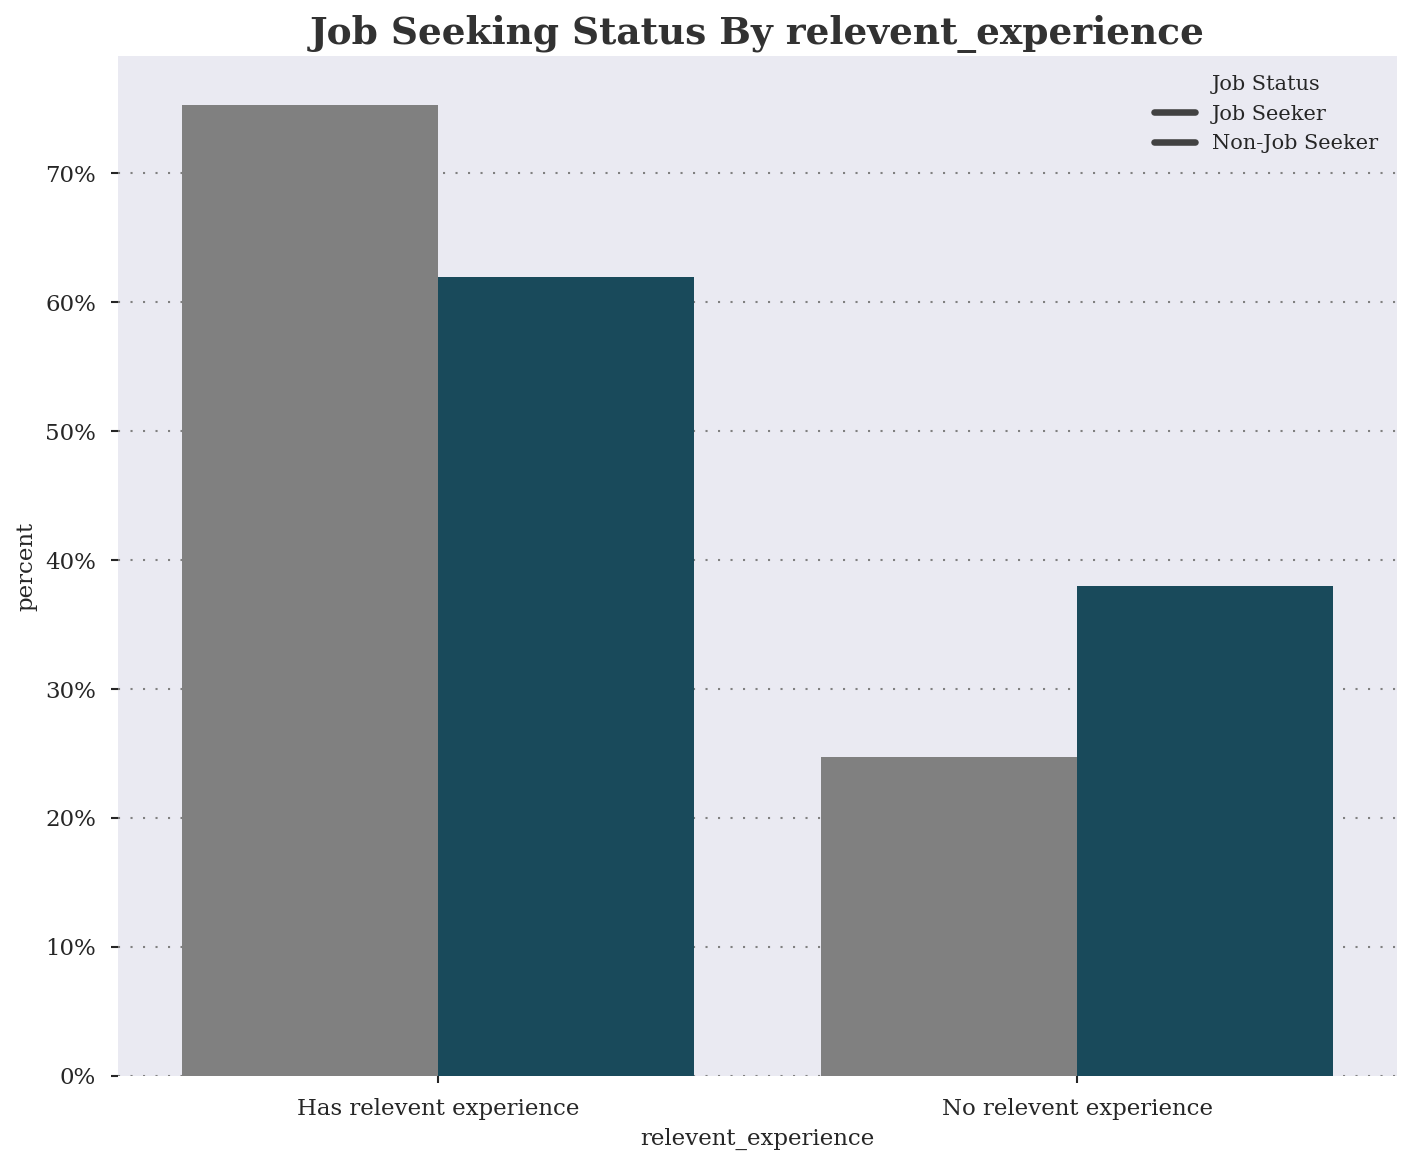

/Users/clairest-donat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


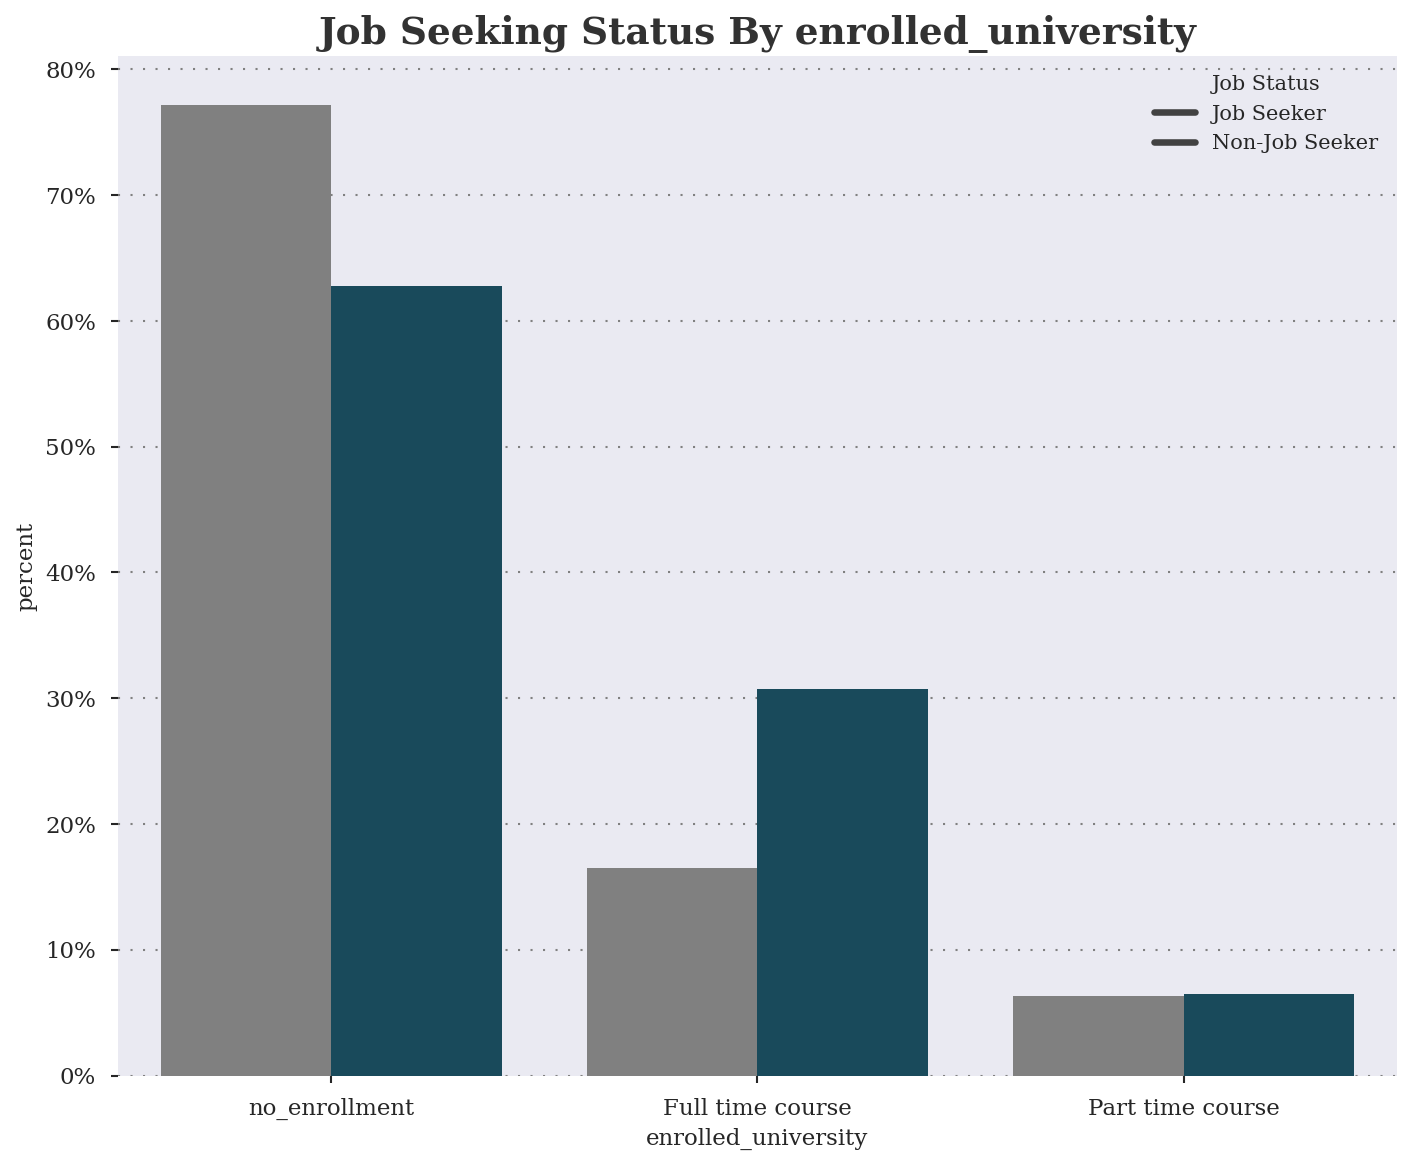

/Users/clairest-donat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


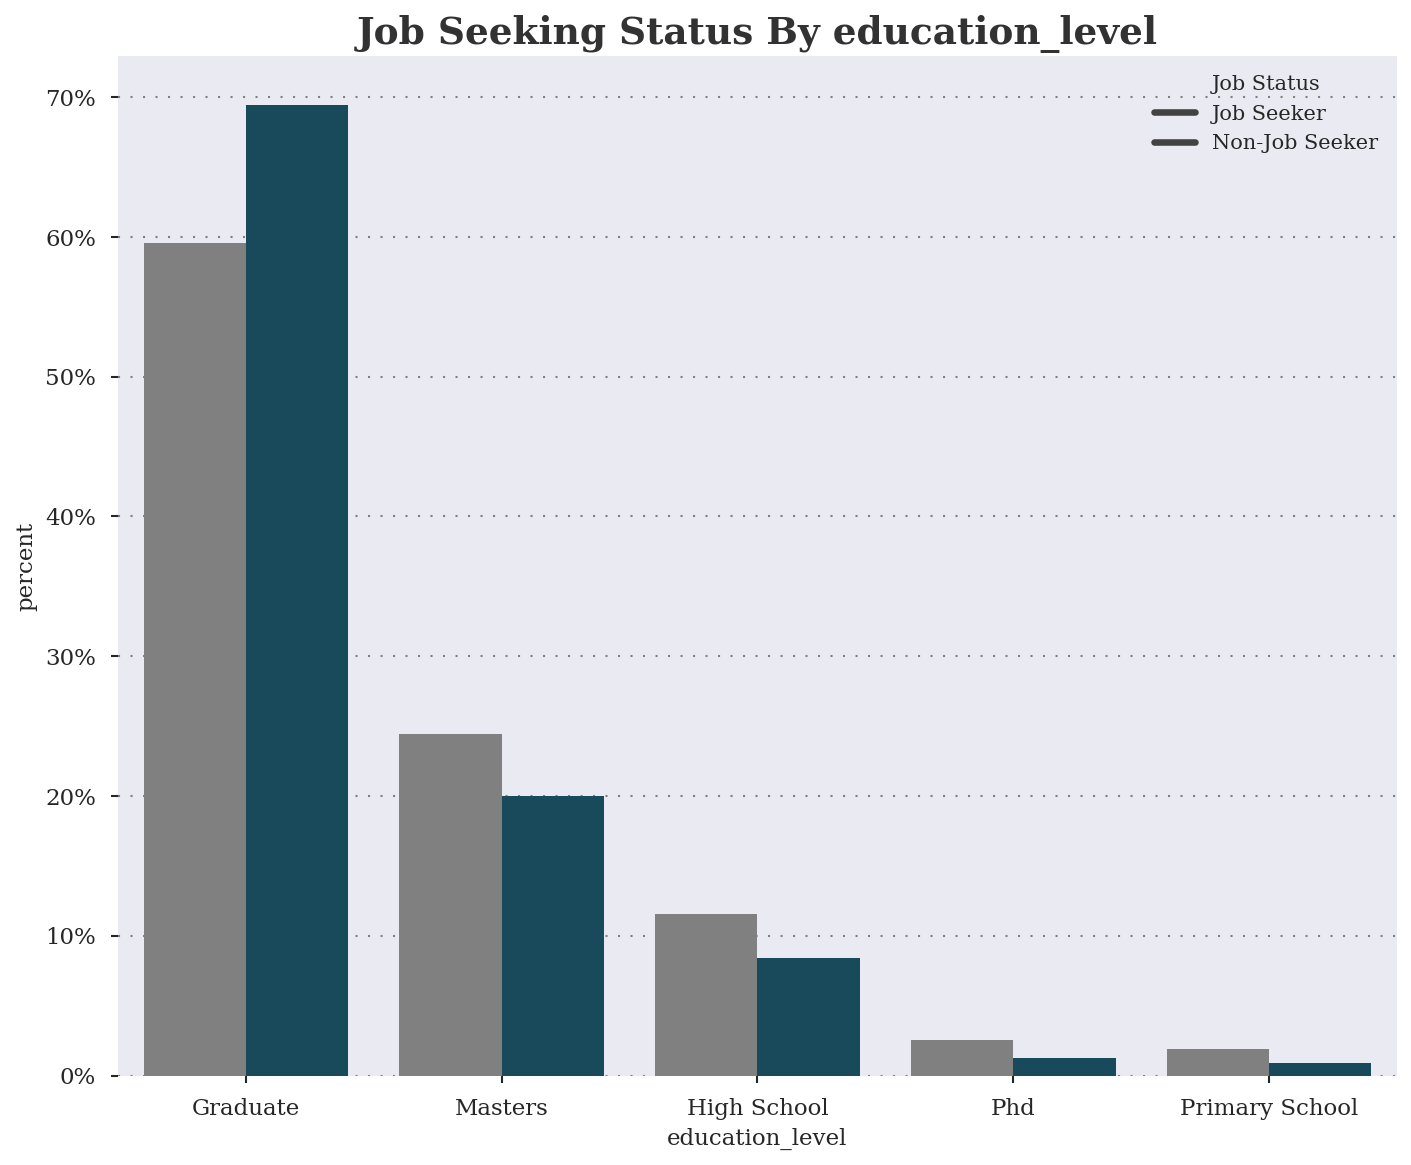

In [101]:
## Capture categorial features with low cardinality
low_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()<=5].tolist()[:-1]

for col in low_cardinality_categorical_cols:
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    x,y = col, 'target'

    graph = aug_train.groupby(y)[x].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    
    sns.barplot(data=graph, x=x, y='percent', hue=y, ax=ax, palette=color_palette)

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    
    plt.title(f"Job Seeking Status By {col}", fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    h, l = ax.get_legend_handles_labels()
    ax.legend(h, labels=['Job Seeker', 'Non-Job Seeker'], title='Job Status')
    #ax.legend(title='Job Status', loc='upper right', labels=['Job Seeker', 'Non-Job Seeker'], frameon=True)
    plt.show()

In [61]:
graph

,target,gender,percent
0,0.0,Male,90.649973
1,0.0,Female,8.098029
2,0.0,Other,1.251998
3,1.0,Male,88.902007
4,1.0,Female,9.622196
5,1.0,Other,1.475797


/Users/clairest-donat/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


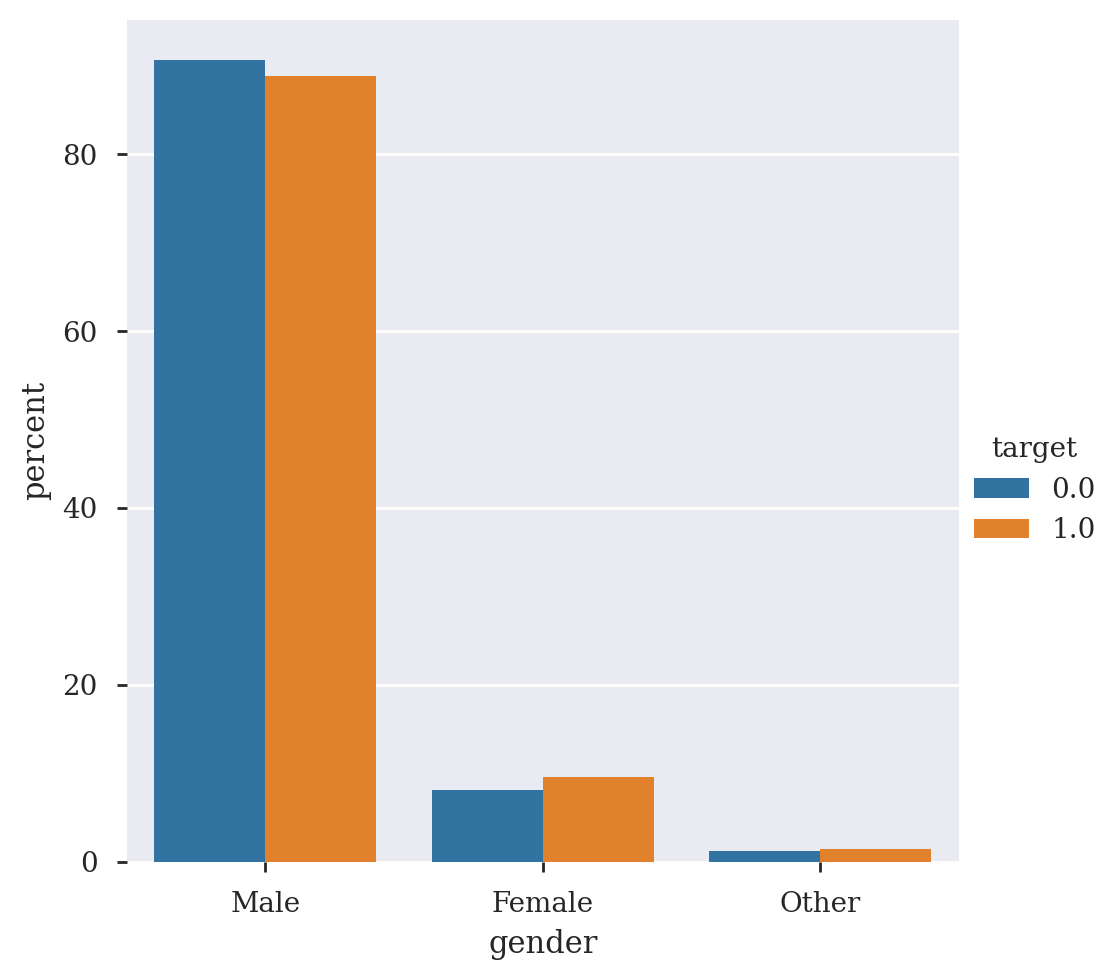

In [73]:
sns.catplot(data=graph, x=x, y='percent', hue=y, kind='bar', ax = ax)
#sns.catplot(x='gender', y='percent', data=graph, hue='gender', kind='bar',)

<AxesSubplot:xlabel='gender', ylabel='count'>

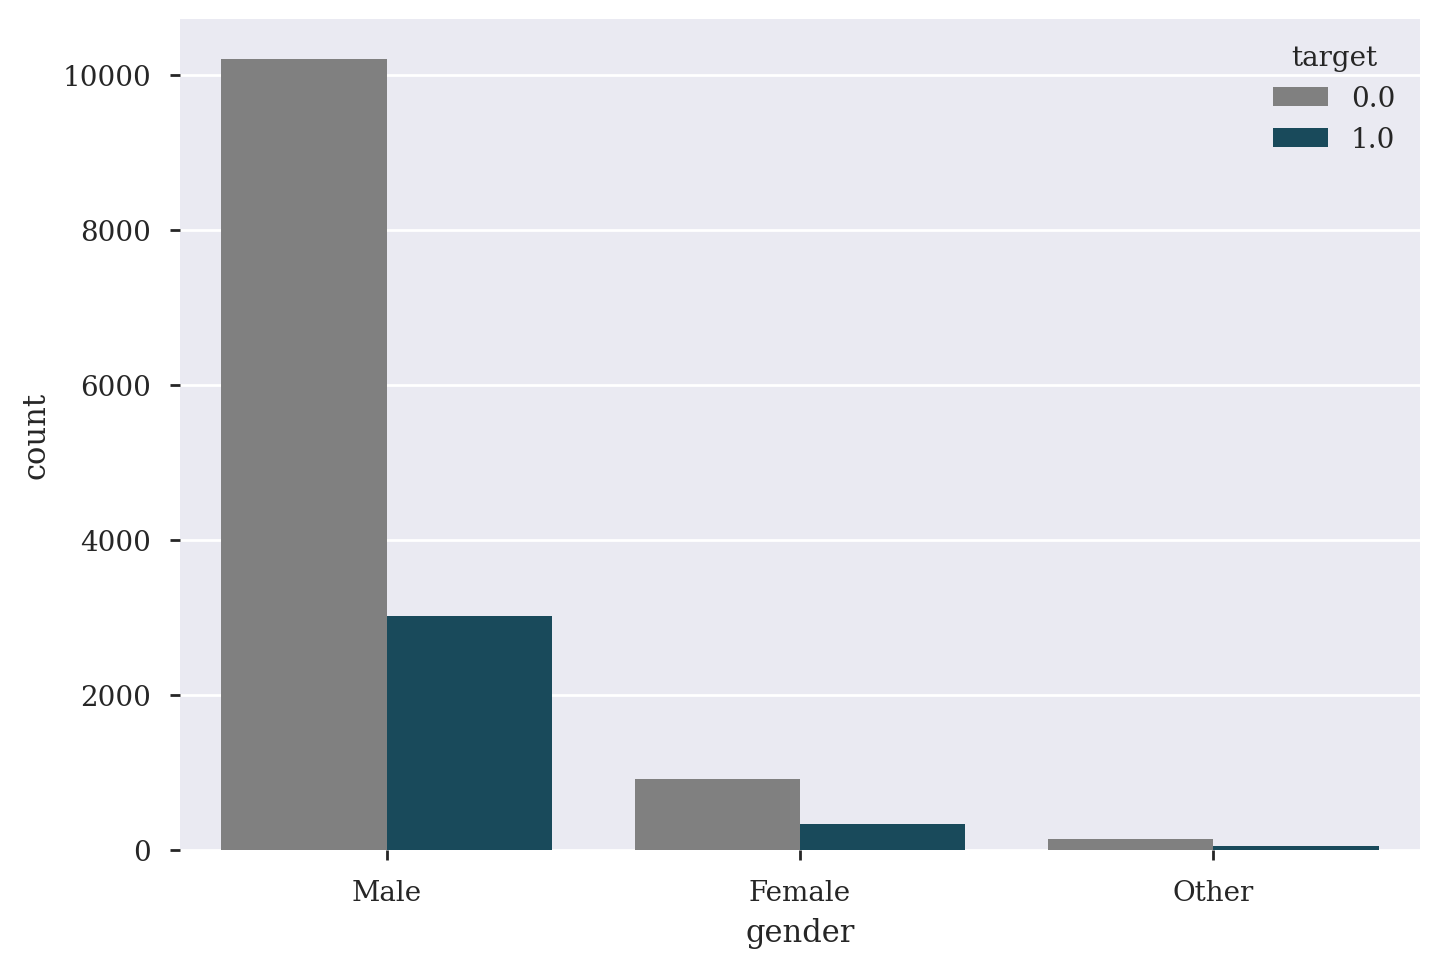

In [44]:
sns.countplot(x="gender", hue="target", data=aug_train, palette=color_palette,zorder=3)

Text(0.5, 1.0, 'Job Seeking Status by Gender')

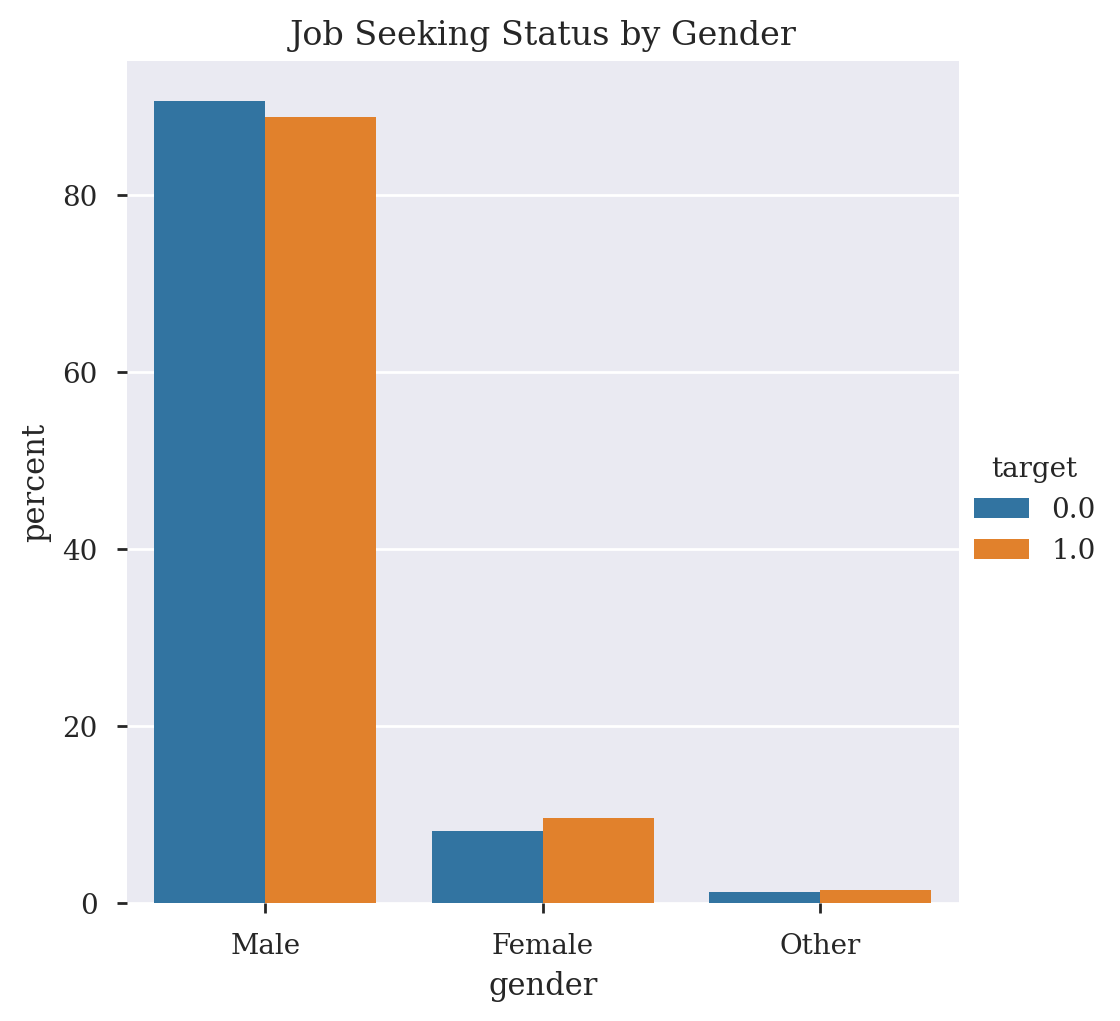

In [53]:
x,y = 'gender', 'target'

(aug_train
.groupby(y)[x]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.title("Job Seeking Status by Gender")

In [52]:
aug_train.groupby(y)[x].value_counts(normalize=True).mul(100)

target  gender
0.0     Male      90.649973
        Female     8.098029
        Other      1.251998
1.0     Male      88.902007
        Female     9.622196
        Other      1.475797
Name: gender, dtype: float64

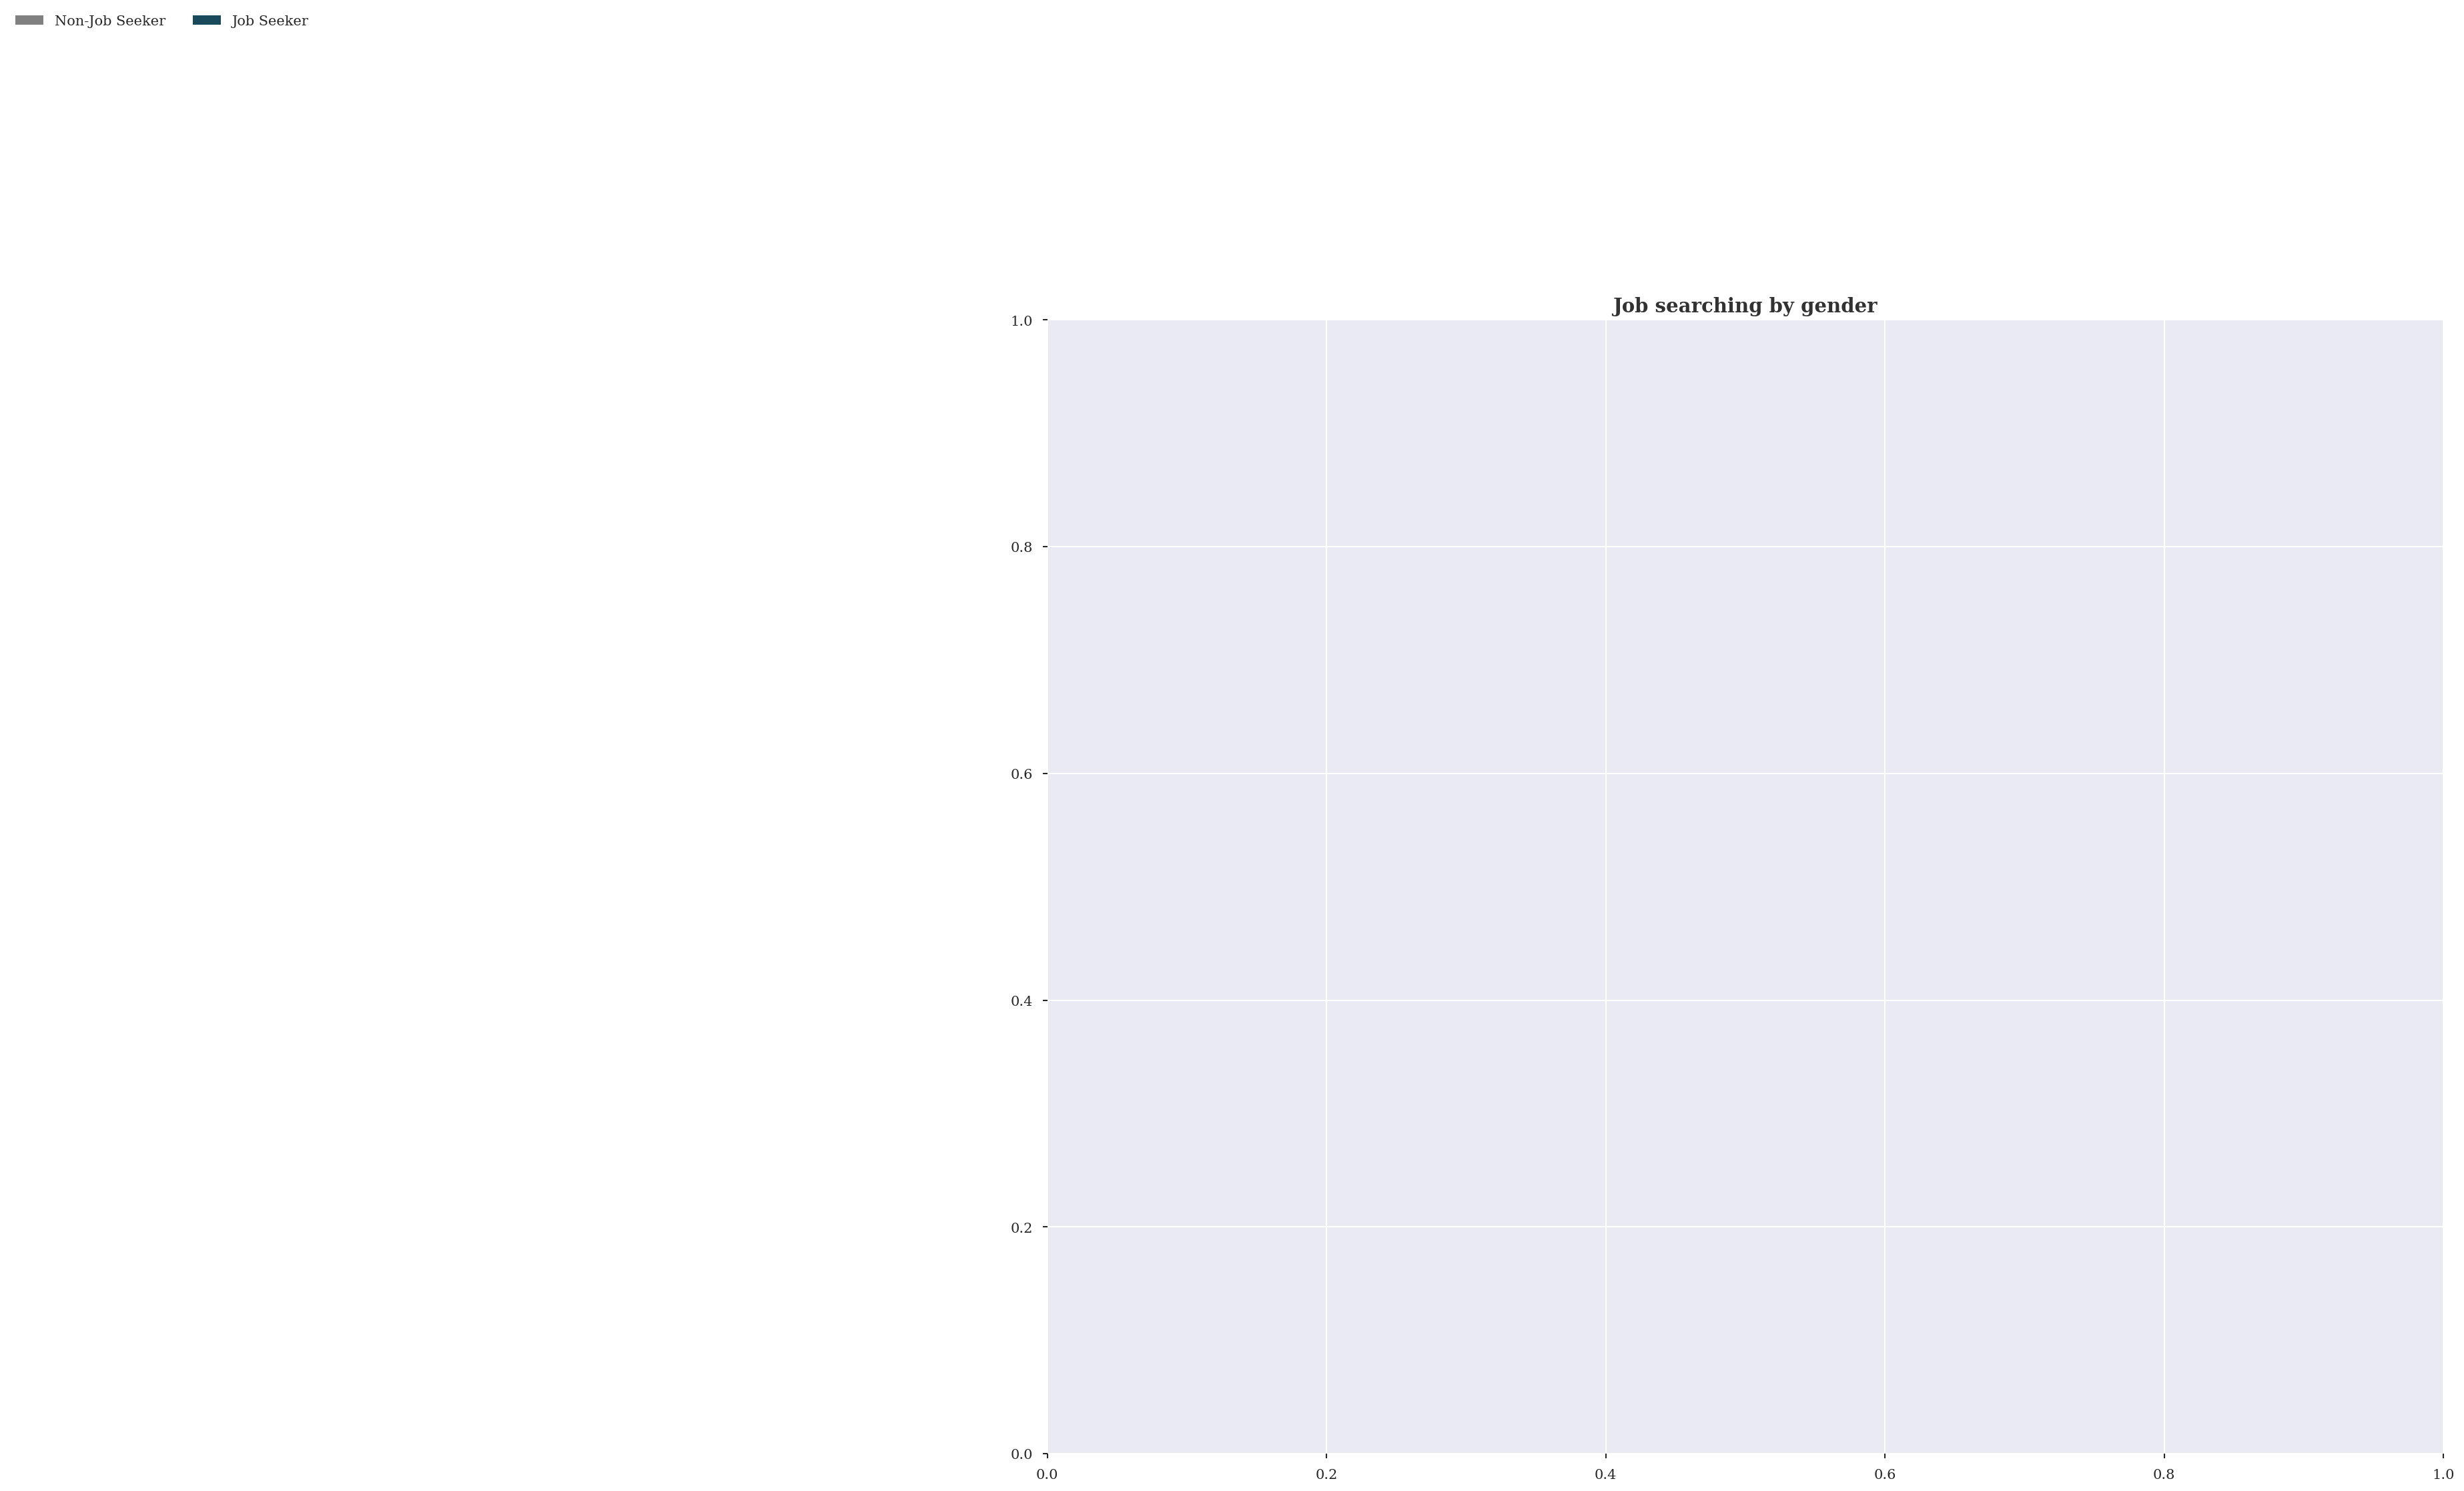

In [43]:
fig = plt.figure(figsize=(18,15), dpi=150)
plt.title('Job searching by gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x="gender", hue="target", data=aug_train, palette=color_palette, ax=ax1, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
plt.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], ncol=2, bbox_to_anchor=(-0.52, 1.28), facecolor=background_color, edgecolor=background_color)
plt.show()

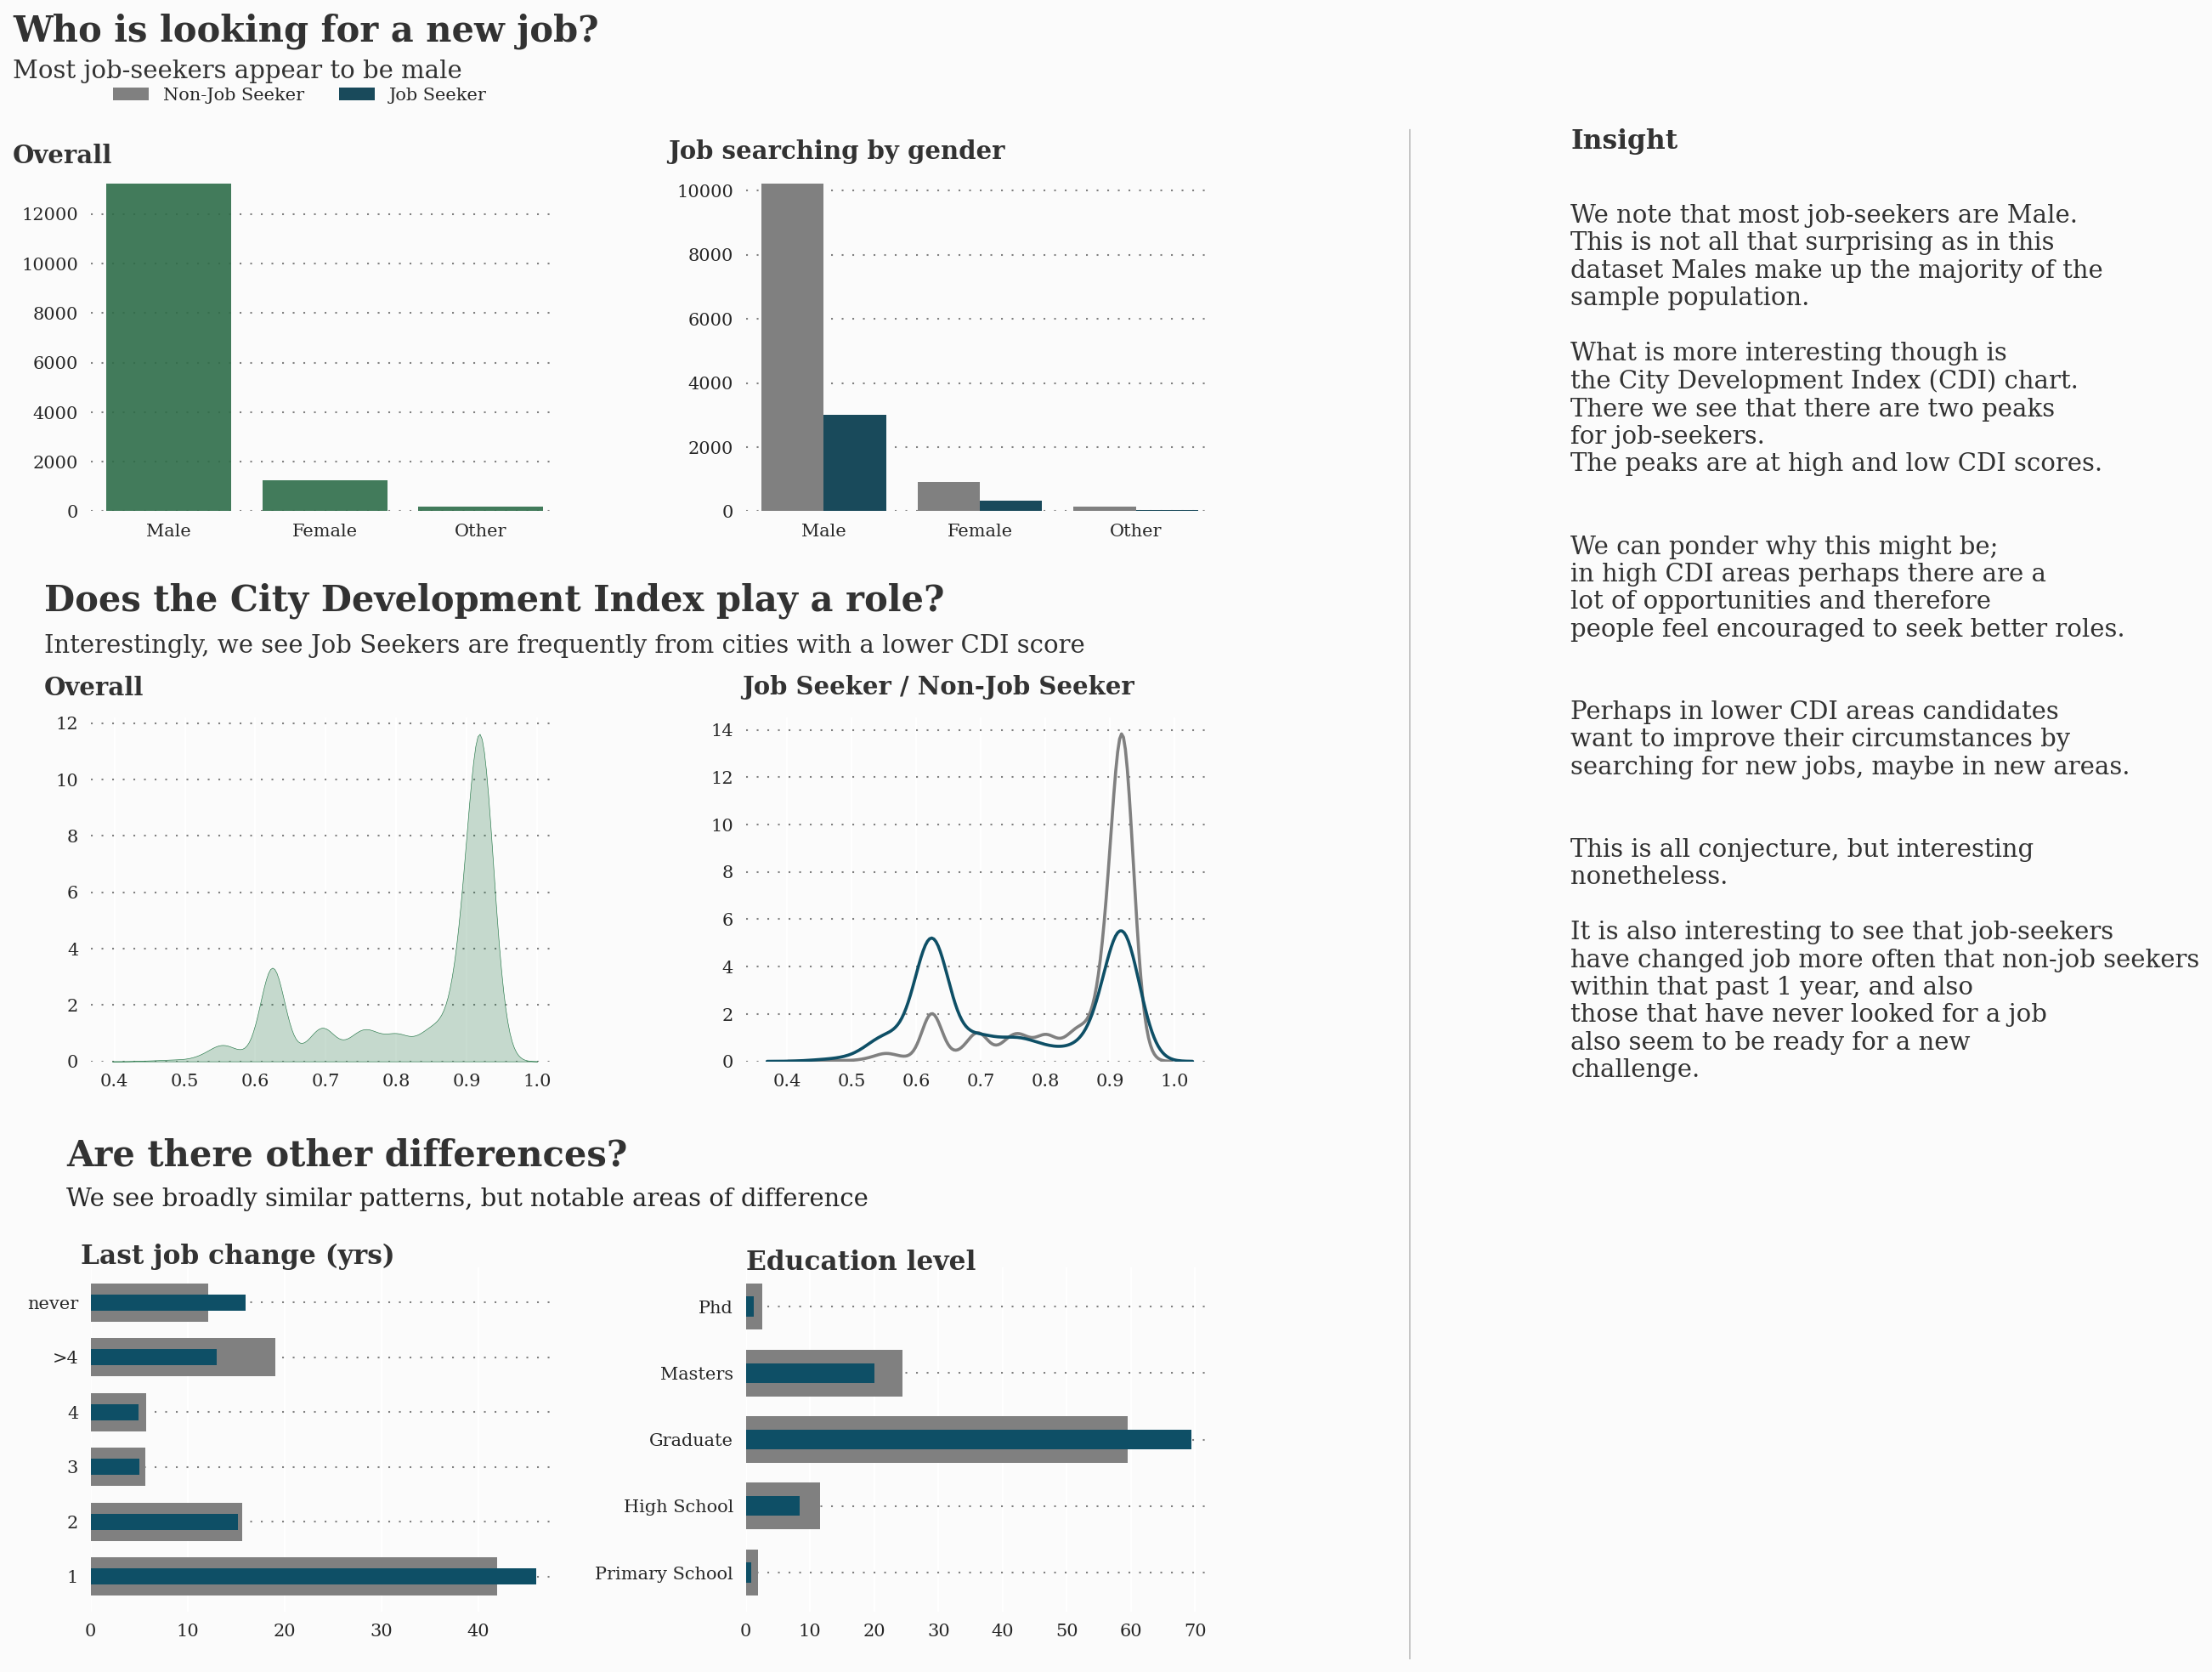

In [13]:
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color) # figure background color
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Distribution
ax0.text(-1, 19000, 'Who is looking for a new job?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-1, 17500, 'Most job-seekers appear to be male', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-1, 14050, 'Overall', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x=aug_train["gender"], color="#247747", ax=ax0, zorder=3,alpha=0.9)

job_order = ['never', '1', '2', '3', '4', '>4']


# Gender
ax1.text(-1, 11000, 'Job searching by gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x="gender", hue="target", data=aug_train, palette=color_palette, ax=ax1, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], ncol=2, bbox_to_anchor=(-0.52, 1.28), facecolor=background_color, edgecolor=background_color)



# CDI
ax2.text(0.3, 16, 'Does the City Development Index play a role?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax2.text(0.3, 14.5, 'Interestingly, we see Job Seekers are frequently from cities with a lower CDI score', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax2.text(0.3, 13, 'Overall', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(aug_train["city_development_index"], color="#247747", shade=True, ax=ax2, zorder=3)



ax3.text(0.33, 15.5, 'Job Seeker / Non-Job Seeker', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(aug_train.loc[(aug_train["target"]==0), "city_development_index"], color="gray", label="Not Survived", ax=ax3)
sns.kdeplot(aug_train.loc[(aug_train["target"]==1), "city_development_index"], color="#0e4f66", label="Survived", ax=ax3)



###
aug_train['count'] = 1
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

job_change = aug_train.groupby(['education_level','last_new_job'])['experience'].sum().unstack().loc[ed_order,job_order]

job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack()
notseek_job_change = no_job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T
seek_job_change = job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T

notseek_job_change.columns = ['count']
seek_job_change.columns = ['count']

notseek_job_change["percentage"] = notseek_job_change["count"].apply(lambda x: x/sum(notseek_job_change["count"])) *100
seek_job_change["percentage"] = seek_job_change["count"].apply(lambda x: x/sum(seek_job_change["count"])) *100


ed_notseek_job_change = no_job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]
ed_seek_job_change = job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]

ed_notseek_job_change.columns = ['count']
ed_seek_job_change.columns = ['count']

ed_notseek_job_change["percentage"] = ed_notseek_job_change["count"].apply(lambda x: x/sum(ed_notseek_job_change["count"])) *100
ed_seek_job_change["percentage"] = ed_seek_job_change["count"].apply(lambda x: x/sum(ed_seek_job_change["count"])) *100

###


ax4.barh(notseek_job_change.index, notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax4.barh(seek_job_change.index, seek_job_change['percentage'], color="#0e4f66", zorder=3, height=0.3)
ax4.xaxis.set_major_locator(mtick.MultipleLocator(10))


##
ax5.barh(ed_notseek_job_change.index, ed_notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax5.barh(ed_seek_job_change.index, ed_seek_job_change['percentage'], color="#0e4f66", zorder=3, height=0.3)
ax5.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
ax4.text(-1, 5.7, 'Last job change (yrs)',fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')
ax5.text(0, 4.55, 'Education level', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 7.5, 'Are there other differences?', 
         fontsize=20, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 6.75, 
         'We see broadly similar patterns, but notable areas of difference', 
         fontsize=14, fontweight='light', fontfamily='serif')


####

fig.text(0.77, 0.89
         , 'Insight', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(0.77, 0.39, '''
We note that most job-seekers are Male.
This is not all that surprising as in this
dataset Males make up the majority of the
sample population.

What is more interesting though is
the City Development Index (CDI) chart.
There we see that there are two peaks
for job-seekers. 
The peaks are at high and low CDI scores. 


We can ponder why this might be;
in high CDI areas perhaps there are a 
lot of opportunities and therefore
people feel encouraged to seek better roles.


Perhaps in lower CDI areas candidates
want to improve their circumstances by
searching for new jobs, maybe in new areas. 


This is all conjecture, but interesting
nonetheless.

It is also interesting to see that job-seekers
have changed job more often that non-job seekers
within that past 1 year, and also
those that have never looked for a job
also seem to be ready for a new
challenge.
'''
         , fontsize=14, fontweight='light', fontfamily='serif',color='#323232')



import matplotlib.lines as lines
l1 = lines.Line2D([0.7, 0.7], [0.1, 0.9], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

for s in ["top","right","left"]:
    for i in range(0,6):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,6):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))      

        
for x in range(0,4):
    for y in range(0,4):
        locals()["ax"+str(x)].set_xlabel("")
        locals()["ax"+str(y)].set_ylabel("")

plt.show()

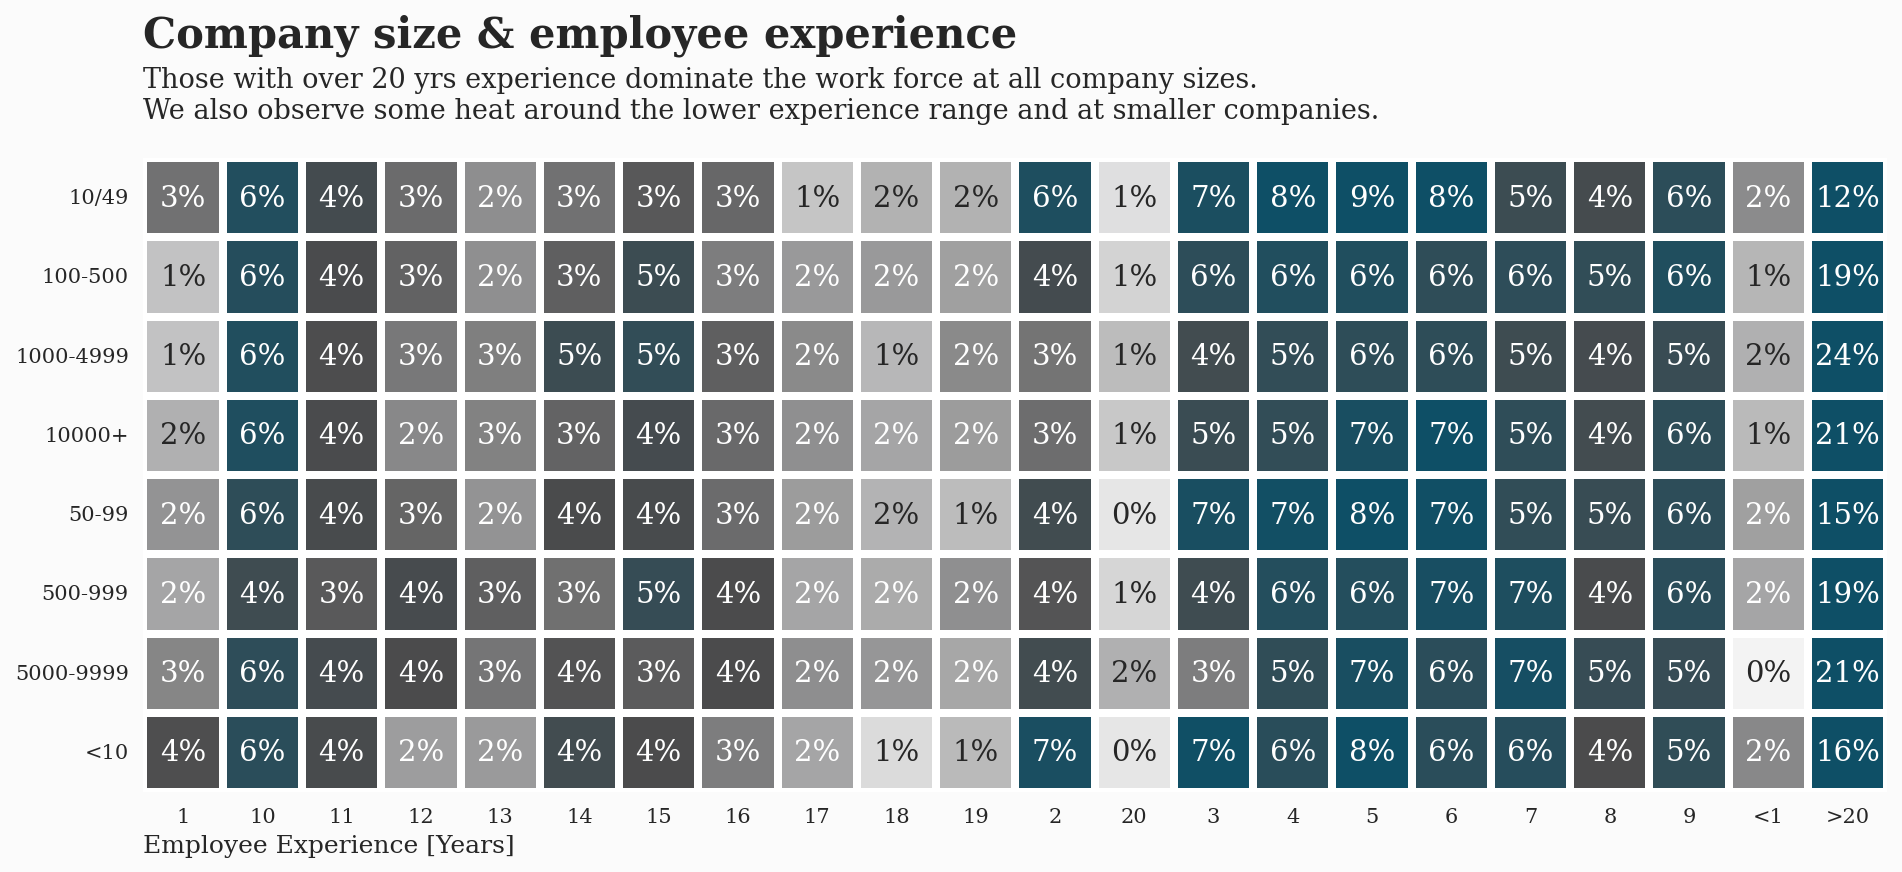

In [14]:
## figure out this plot from the Kaggle notebook - make this more efficient
## fix ordering
aug_train['count'] = 1

pv_gen_size = pd.pivot_table(aug_train, values='count',index=['gender'],columns=['company_size'],aggfunc=np.sum)
ct_gen_size = pd.crosstab(aug_train['company_size'],aug_train['experience'], normalize='index')


fig = plt.figure(figsize=(15,10), dpi=150) 
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=-0.09)
ax0 = fig.add_subplot(gs[:,:])

colors = ["#fbfbfb", "#4b4b4c","#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=ct_gen_size, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

 
ax0.set_facecolor(background_color) 
ax0.set_xlabel("Employee Experience [Years]",fontfamily='serif',fontsize=12,loc='left')
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

    
ax0.text(0, -1.4, 
         'Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.9, 
         'Those with over 20 yrs experience dominate the work force at all company sizes.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax0.text(0, -0.5, 
         'We also observe some heat around the lower experience range and at smaller companies.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.tick_params(axis=u'both', which=u'both',length=0)
plt.show()